In [1]:
# Imports
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
from timeit import default_timer as timer
print(tf.test.is_gpu_available())
plt.rcParams["figure.figsize"] = (20,10)

True


In [ ]:
# Parameters 
# ATTEMPT_NAME="LSTM_BASELINE"
# DATASET_FILE_PATH= ["Datasets\\uniformdata.xlsx", "Datasets\\uniformdata.xlsx", "Datasets\\uniformdata.xlsx", "Datasets\\uniformdata.xlsx", "Datasets\\uniformdata.xlsx"]
# DATASET_SHEET_TITLE= ["data_uniforma", "data_uniformb", "data_uniformc", "data_uniformd", "data_uniforme"]
# GRANULARITY=10
# STEP_SIZE_SLIDING_WINDOW=5
# PAST_HISTORY=20
# FUTURE_TARGET=1
# VAL_PERCENT=0.1
# EPOCHS=5
# BATCH_SIZE=10
# SMOOTHING=50
# SHUFFLE_BUFFER_SIZE=100
# MEAN=False
# USE_REF_POINTS=False
# REF_POINT1=0
# REF_POINT2=7

In [ ]:
def run_all(DATASET_FILE_PATH, DATASET_SHEET_TITLE, GRANULARITY, STEP_SIZE_SLIDING_WINDOW, PAST_HISTORY, 
            FUTURE_TARGET, VAL_PERCENT, EPOCHS, BATCH_SIZE, SMOOTHING, ATTEMPT_NAME, SHUFFLE_BUFFER_SIZE, MEAN,
            USE_REF_POINTS, REF_POINT1, REF_POINT2): 
    batch_train, batch_val, batch_test, test_ground_truth, train_slices, val_slices, test_data_indexes, data_shape = process_data(
        DATASET_FILE_PATH, DATASET_SHEET_TITLE, GRANULARITY, SMOOTHING, VAL_PERCENT, PAST_HISTORY, 
        FUTURE_TARGET, STEP_SIZE_SLIDING_WINDOW, BATCH_SIZE, EPOCHS, SHUFFLE_BUFFER_SIZE, MEAN, 
        USE_REF_POINTS, REF_POINT1, REF_POINT2)
    model, training_history, training_time = run_cnn(data_shape, batch_train, batch_val, train_slices, 
                                                      val_slices, BATCH_SIZE, EPOCHS, FUTURE_TARGET) 
    evaluate_results(model, training_history, test_ground_truth, batch_test, test_data_indexes, training_time)

In [2]:
# Load components
%run ./data_management_component.ipynb

In [ ]:
%run ./cnn_baseline.ipynb

In [10]:
%run ./lstm_baseline.ipynb

In [ ]:
%run ./nn_baseline.ipynb

In [ ]:
%run ./parallel_model.ipynb

In [ ]:
%run ./parallel_model_deep.ipynb

In [8]:
%run ./evaluation_component.ipynb

Working on dataset: Datasets\SingleSessionData.xlsx data_Uniform TRAIN SET number 0


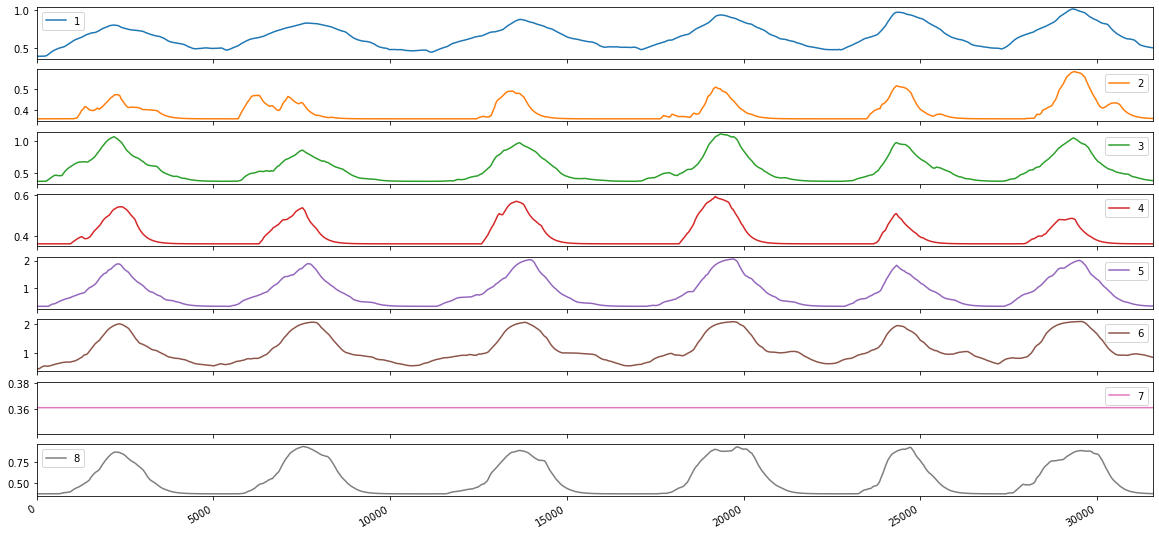

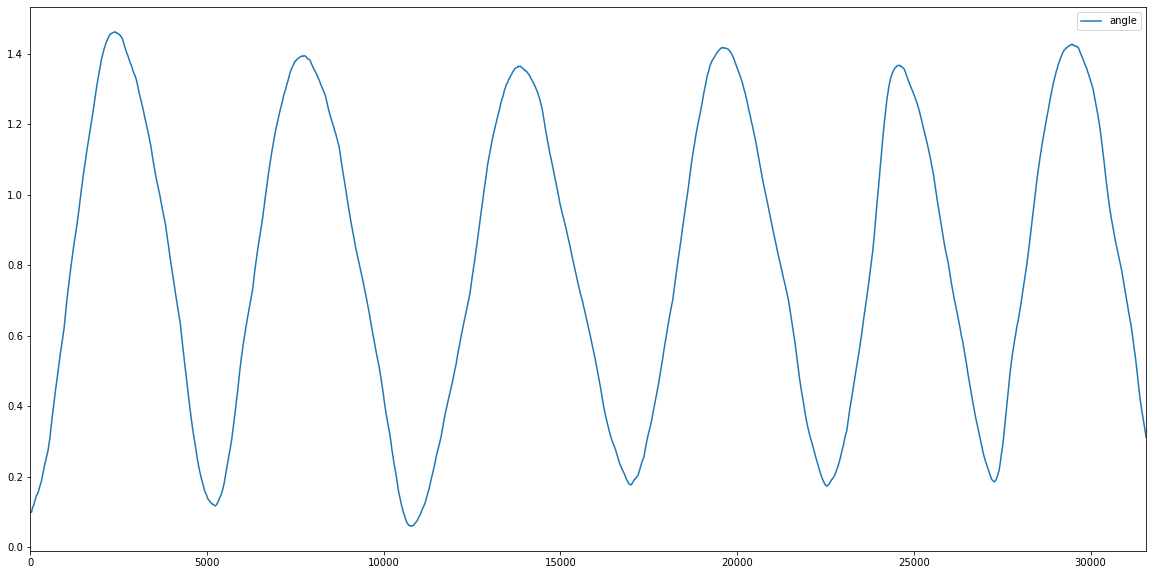

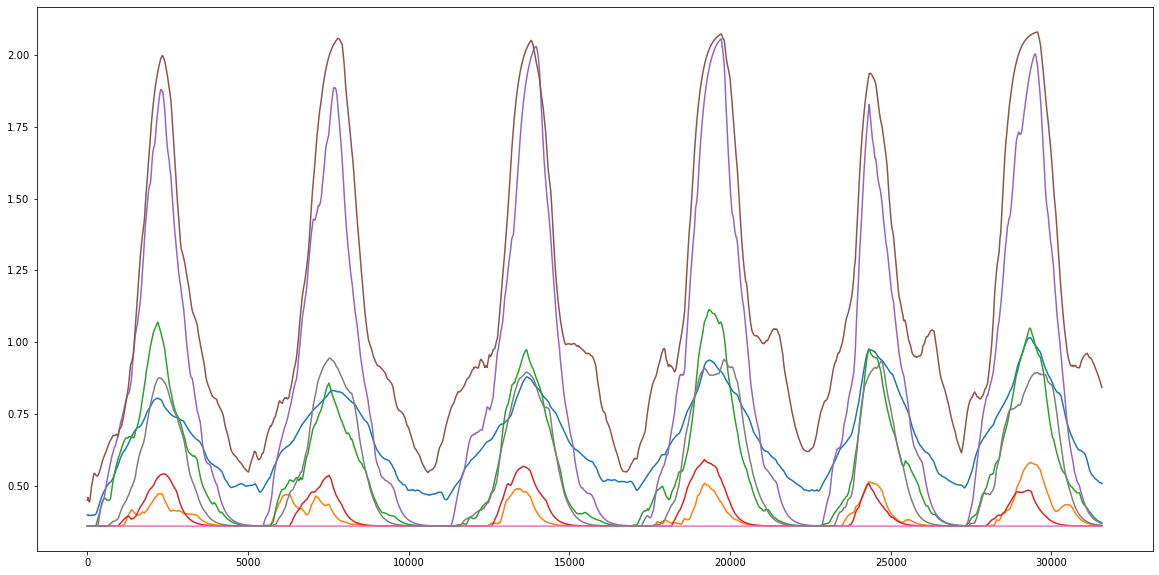

(100, 8)
(2584, 100, 8) (373, 100, 8)
2584 373
Working on dataset: Datasets\SingleSessionData.xlsx data_NonUniform TRAIN SET number 1


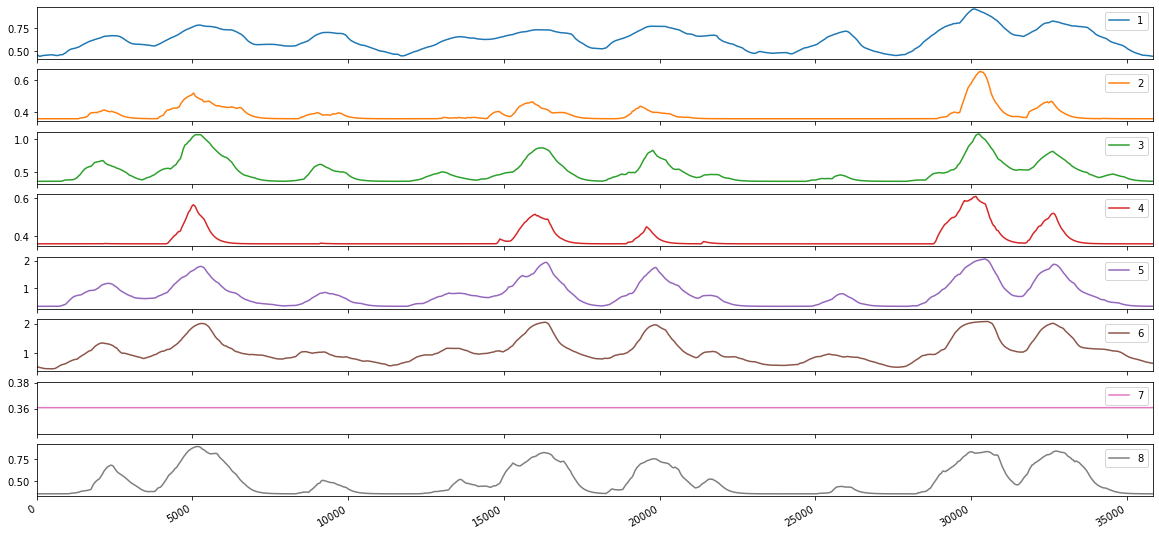

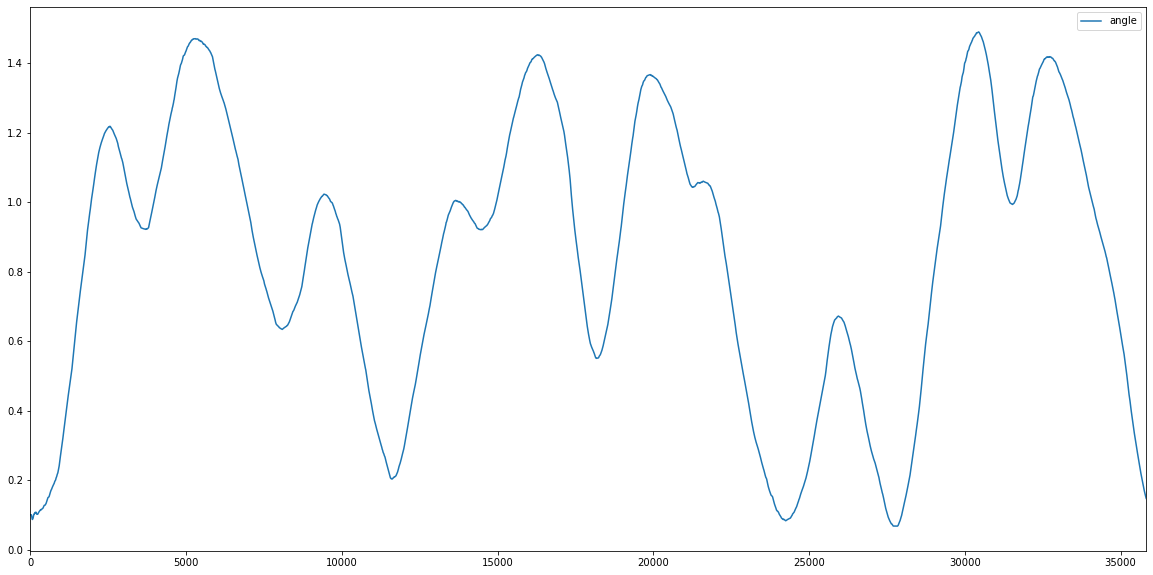

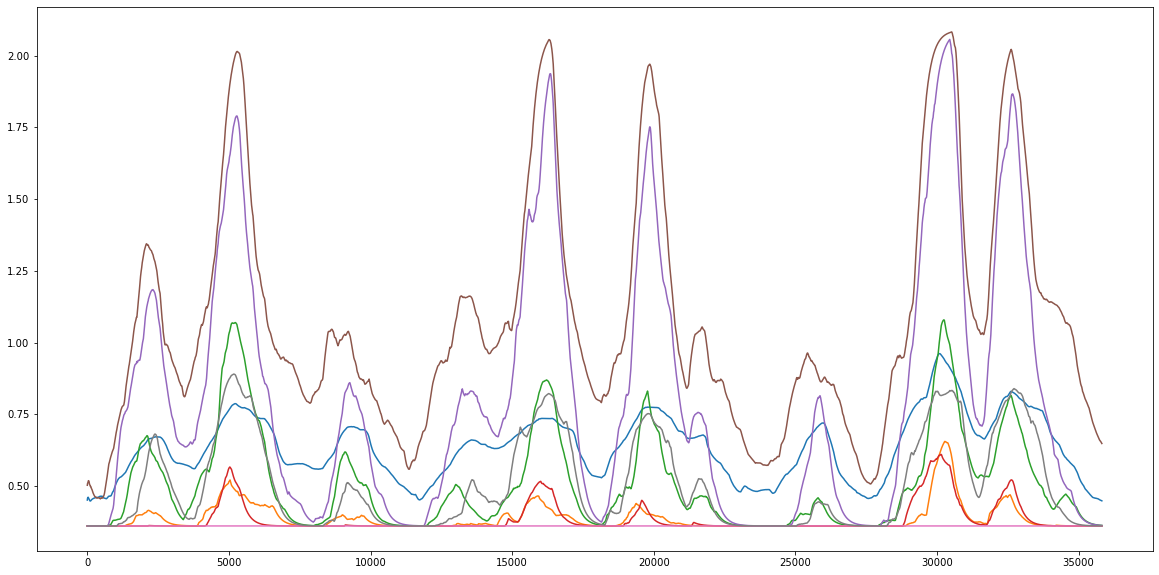

(100, 8)
(2945, 100, 8) (437, 100, 8)
5529 810
Working on dataset: Datasets\SingleSessionData.xlsx data_NonUniformWithPause TRAIN SET number 2


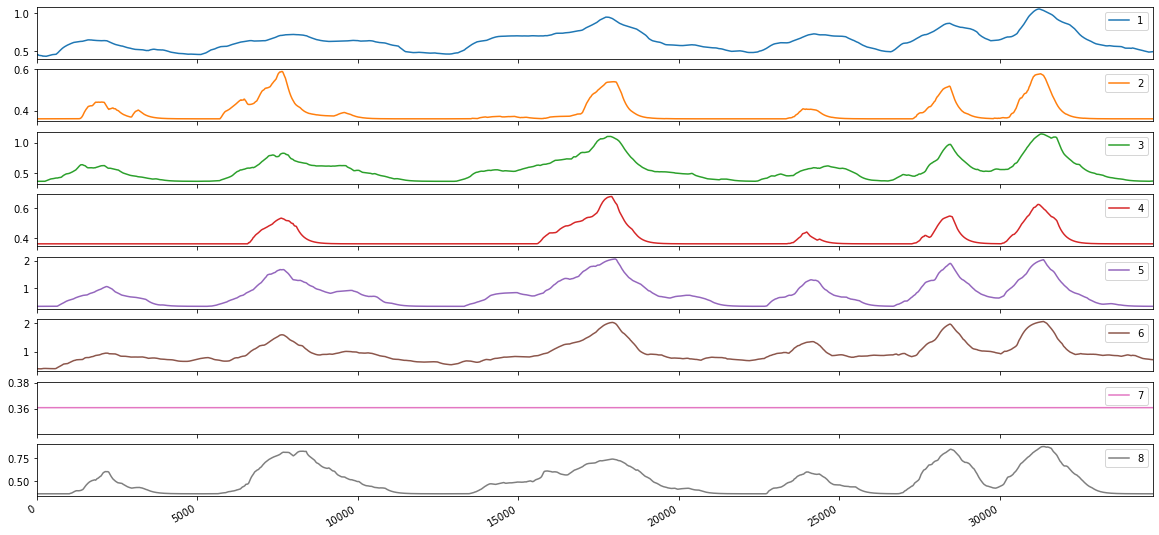

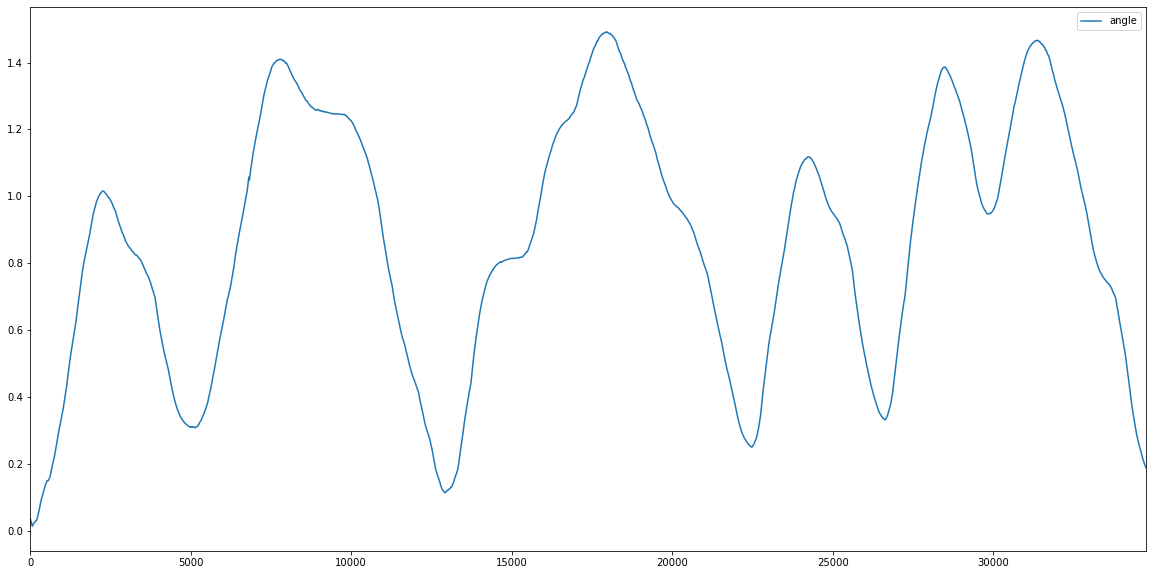

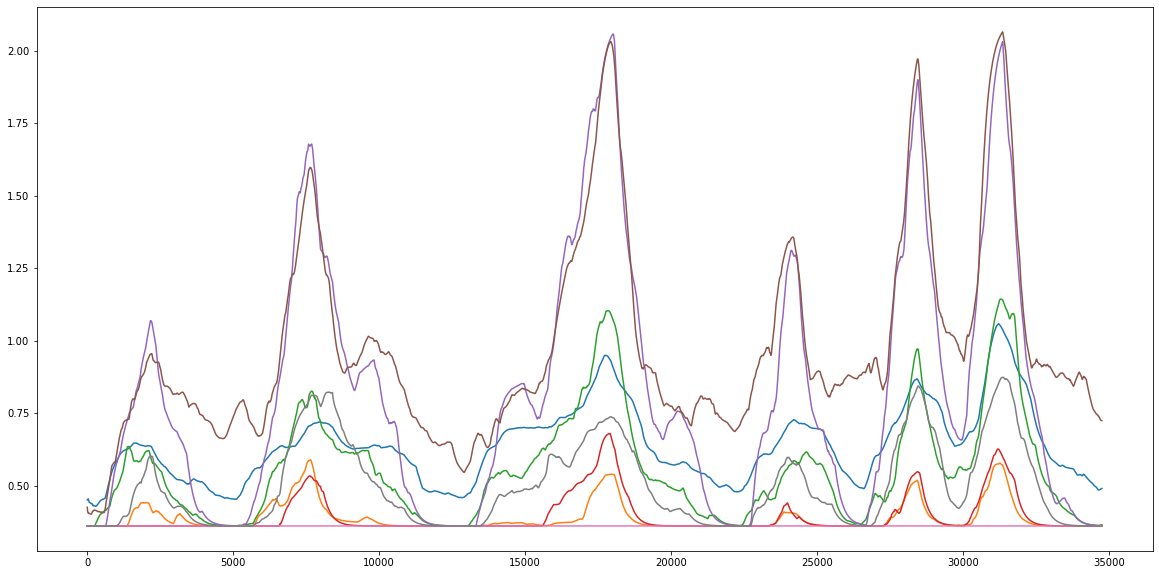

(100, 8)
(2855, 100, 8) (421, 100, 8)
8384 1231
Working on dataset: Datasets\SingleSessionData.xlsx data_NonUniformTwo TRAIN SET number 3


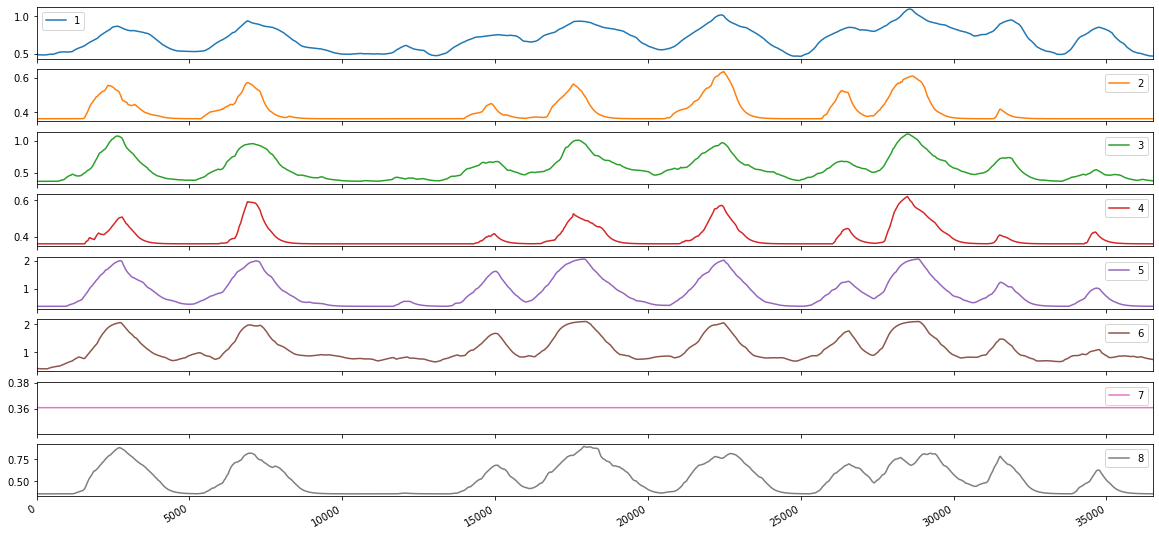

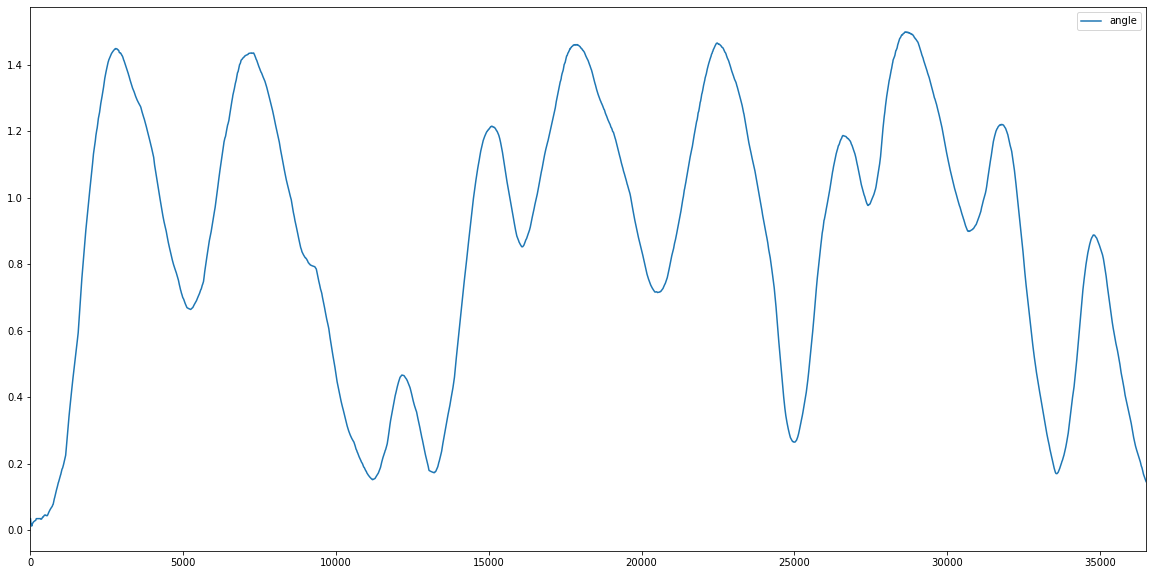

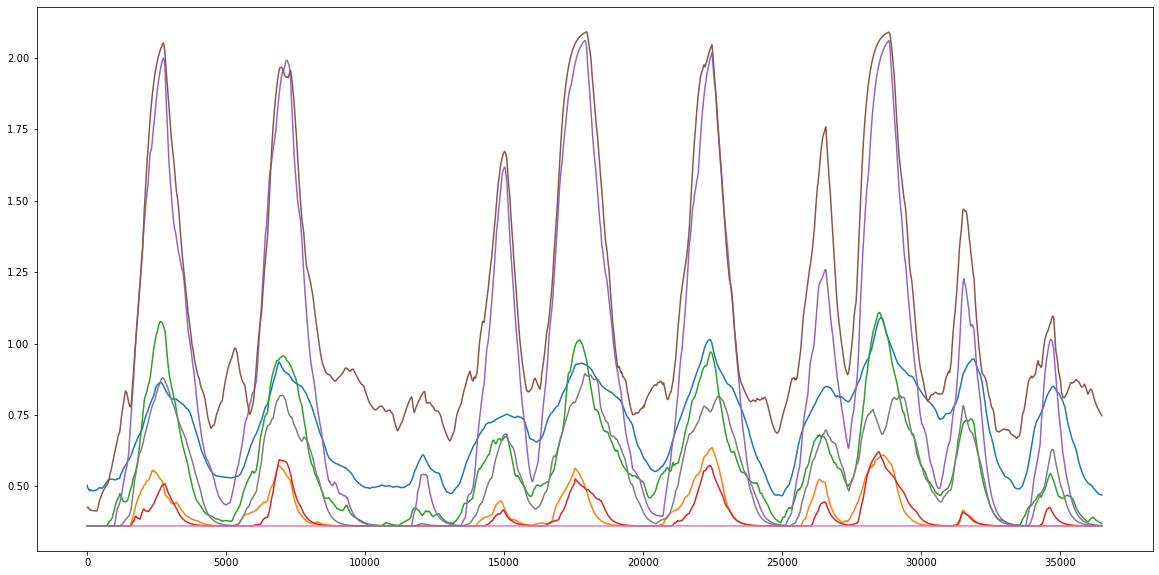

(100, 8)
(3004, 100, 8) (447, 100, 8)
11388 1678
Working on dataset: Datasets\SessionToSessionOne.xlsx data_Uniform TRAIN SET number 4


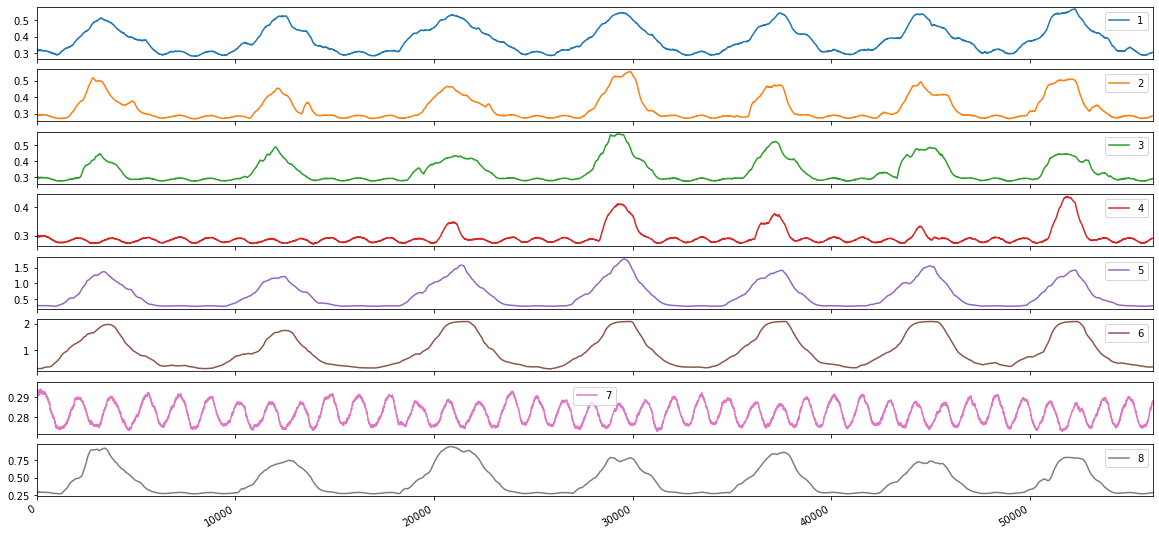

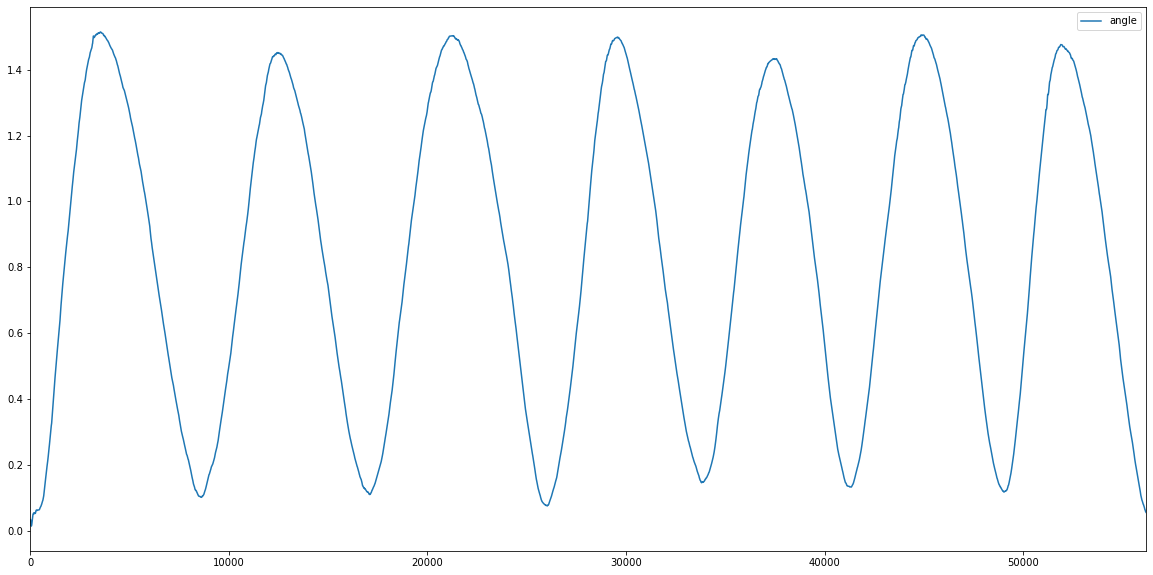

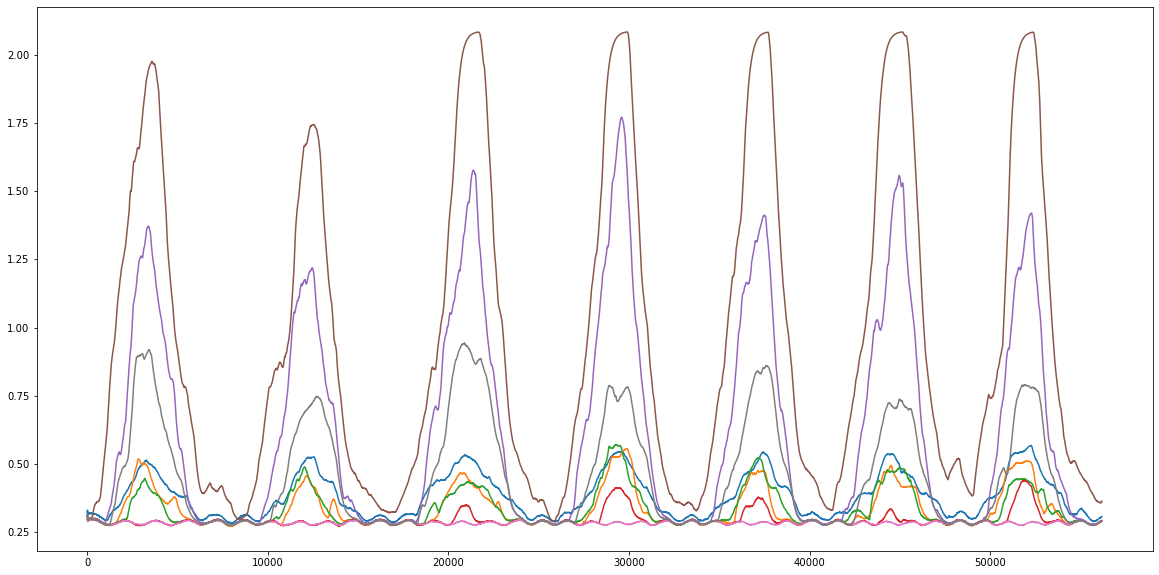

(100, 8)
(4676, 100, 8) (742, 100, 8)
16064 2420
Working on dataset: Datasets\SessionToSessionOne.xlsx data_NonUniform TRAIN SET number 5


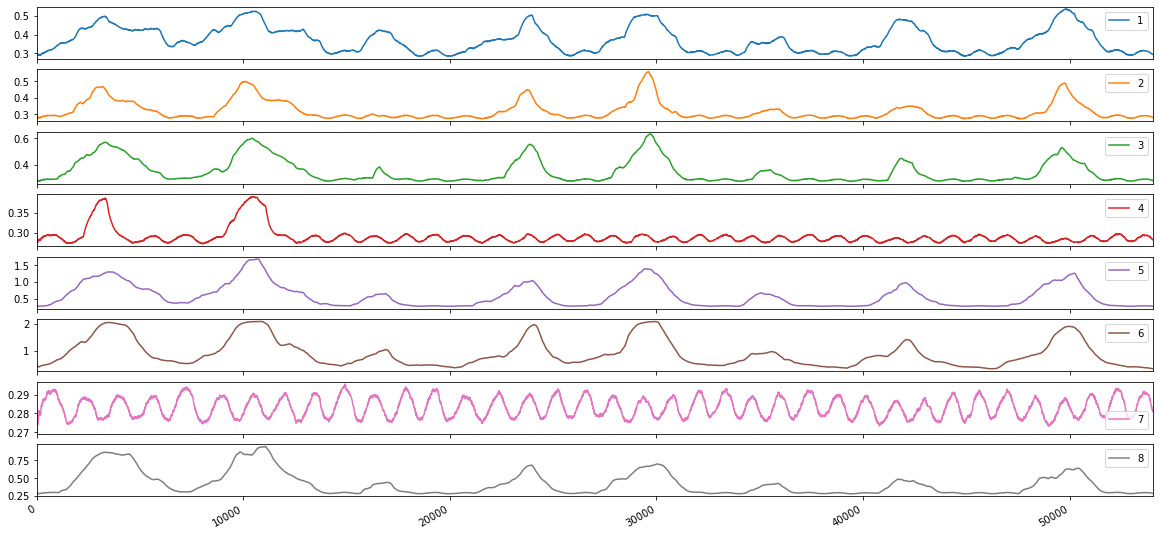

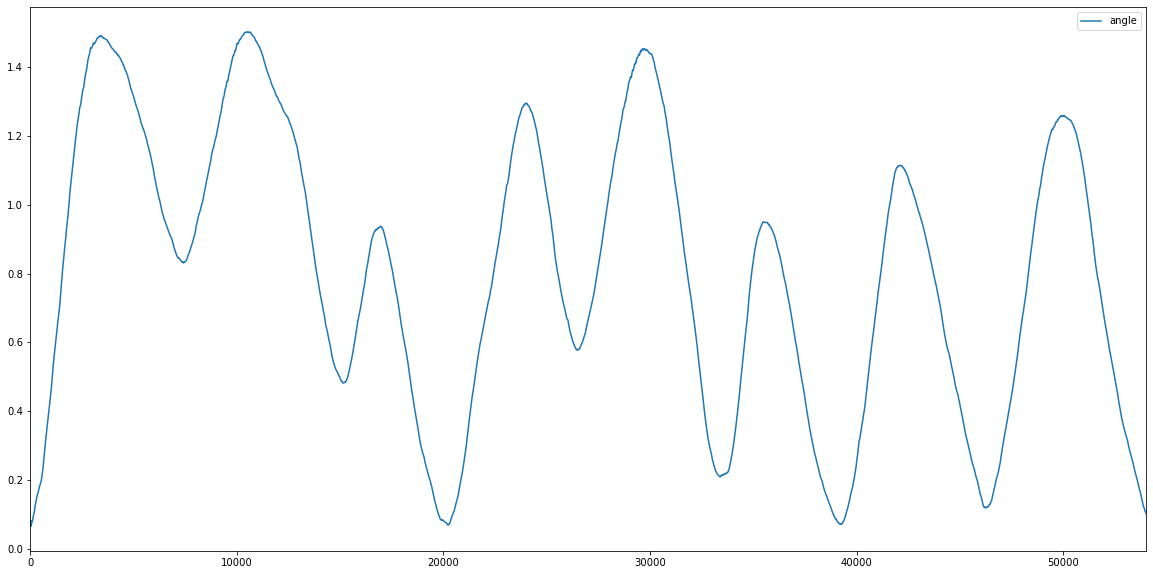

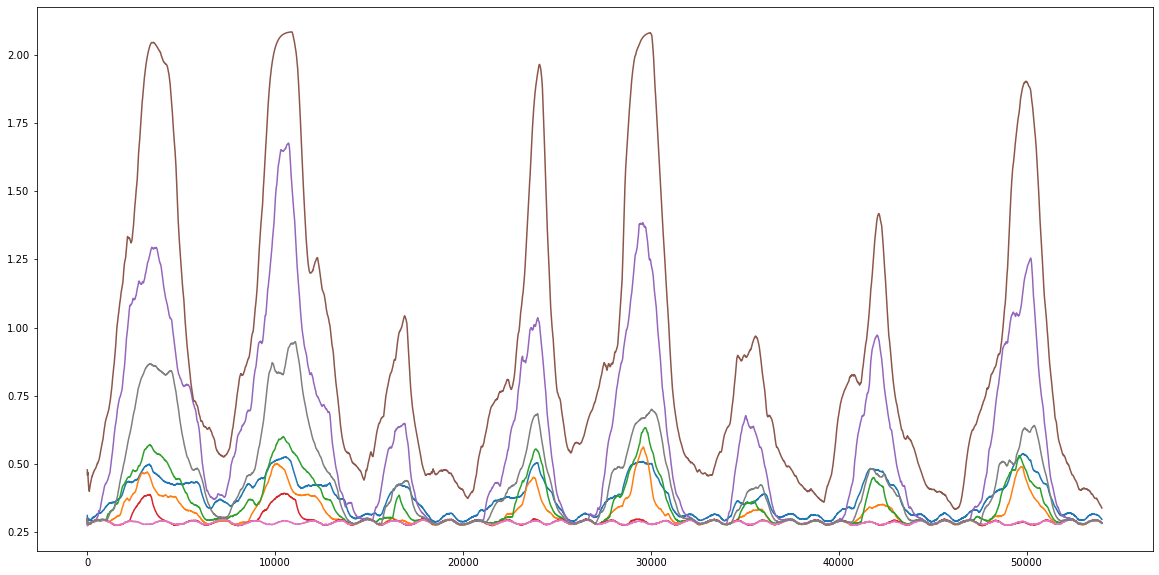

(100, 8)
(4491, 100, 8) (710, 100, 8)
20555 3130
Working on dataset: Datasets\SessionToSessionOne.xlsx data_NonUniformWithPause TRAIN SET number 6


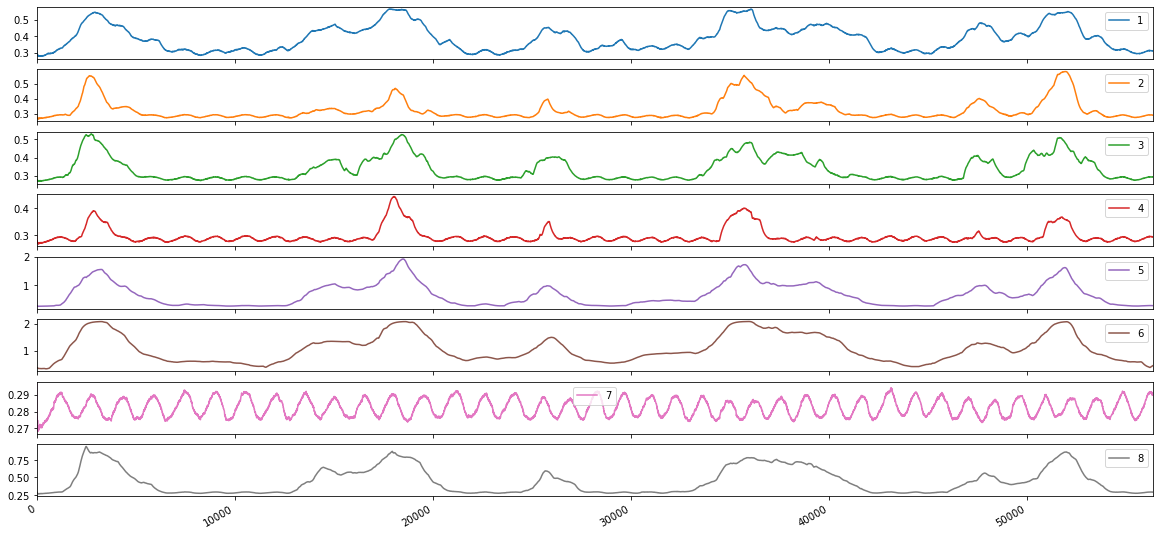

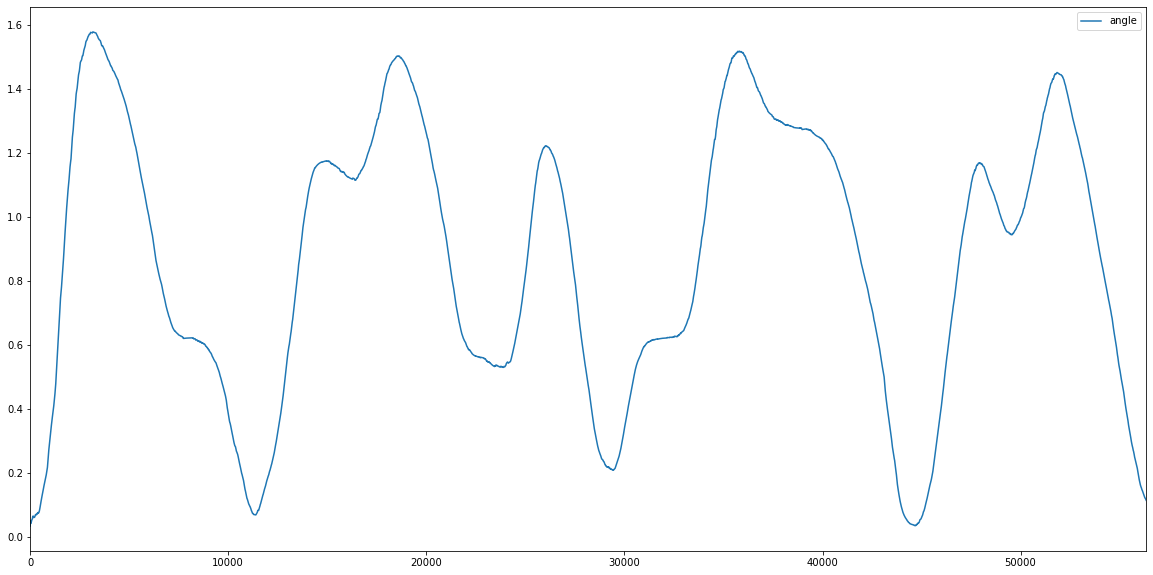

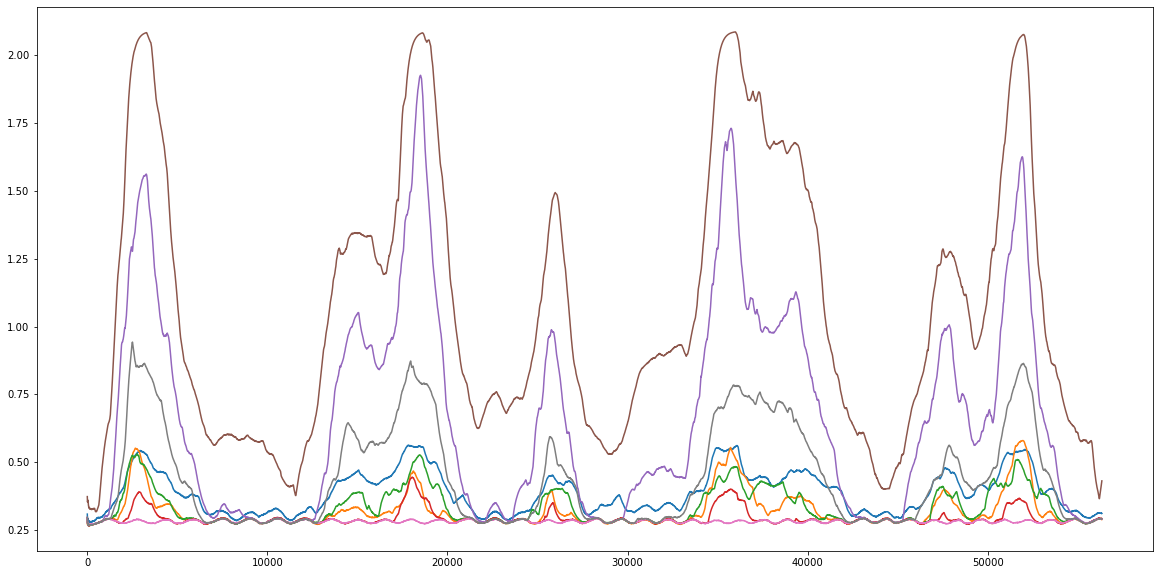

(100, 8)
(4689, 100, 8) (745, 100, 8)
25244 3875
Working on dataset: Datasets\SessionToSessionOne.xlsx data_UniformWithPause TRAIN SET number 7


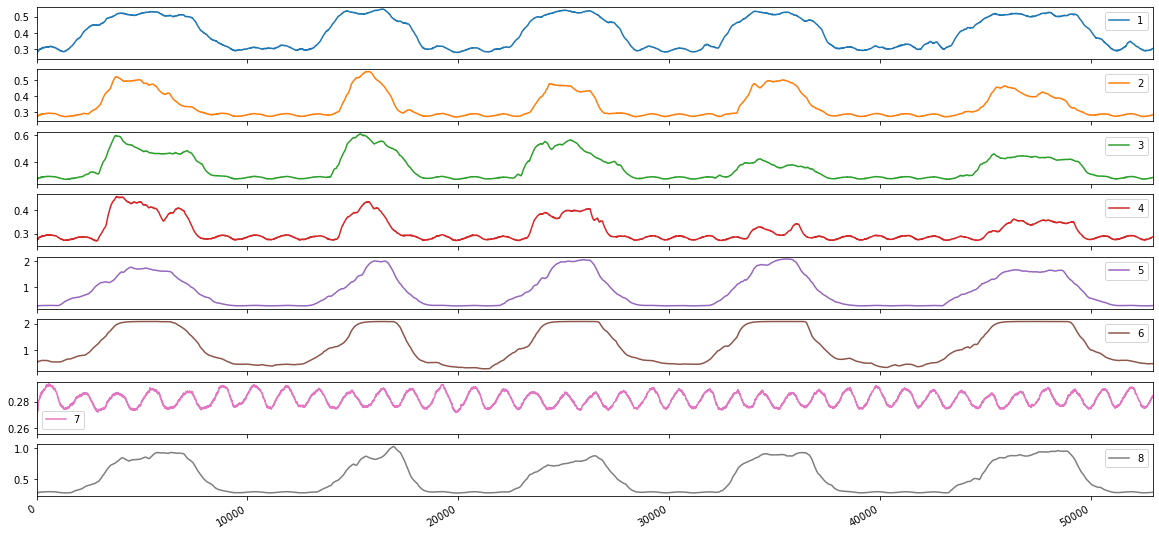

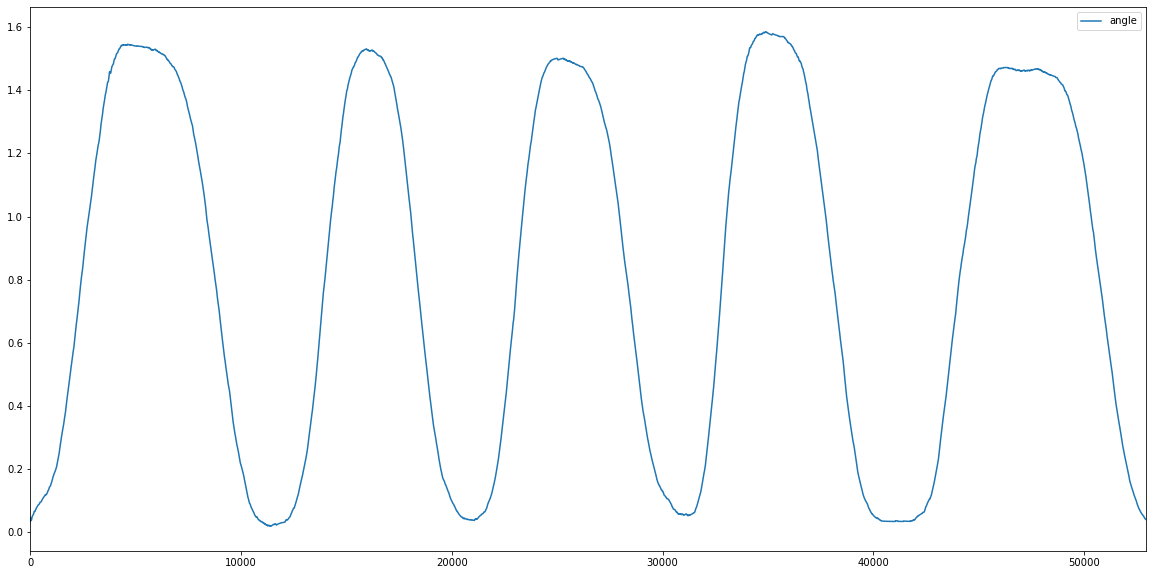

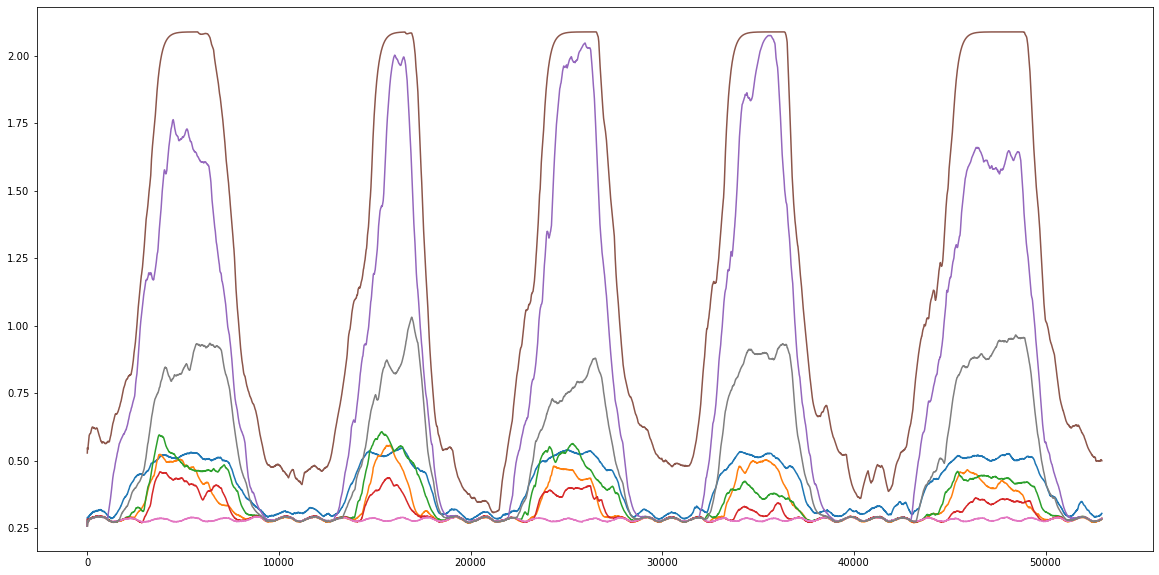

(100, 8)
(4400, 100, 8) (694, 100, 8)
29644 4569
Working on dataset: Datasets\SessionToSessionTwo.xlsx data_Uniform TRAIN SET number 8


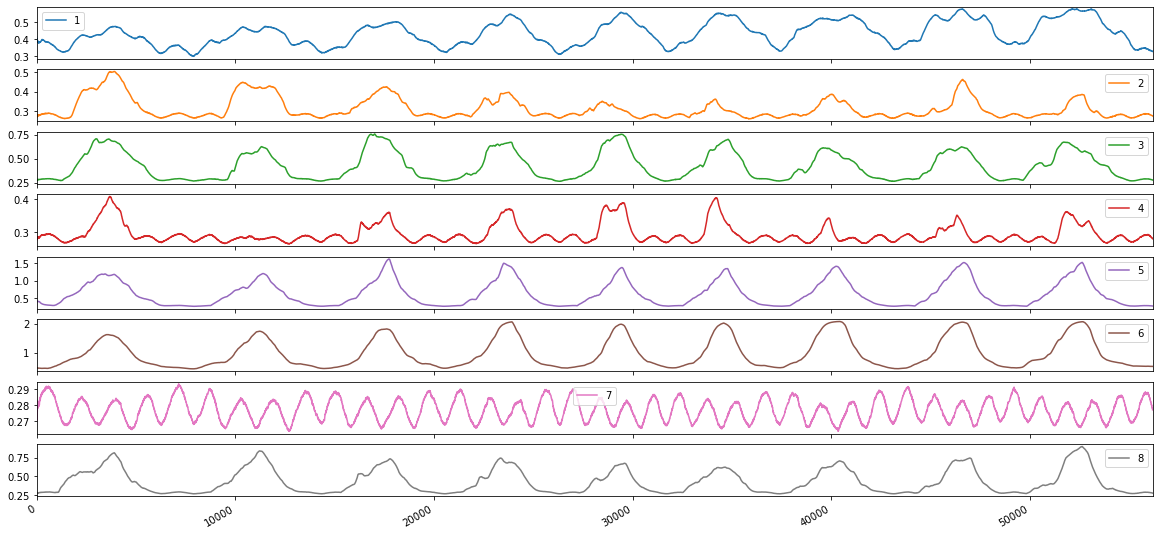

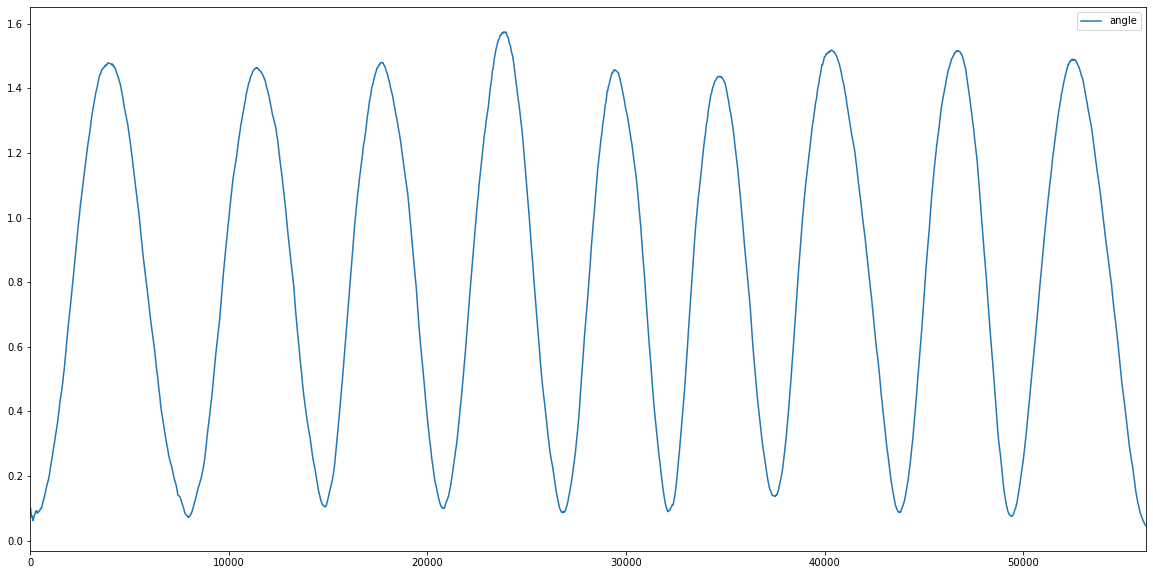

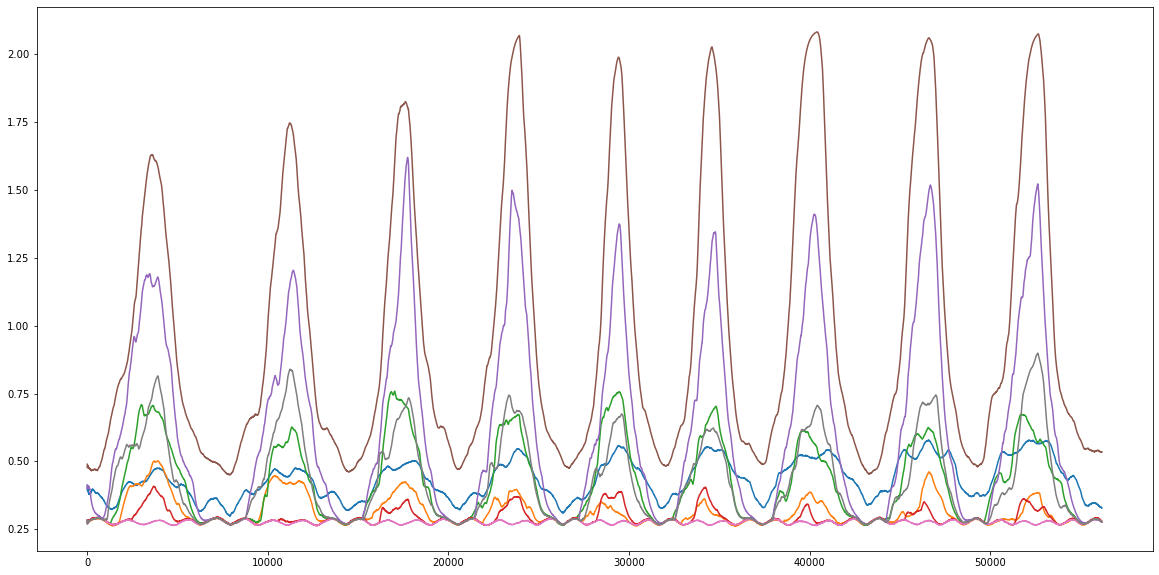

(100, 8)
(4676, 100, 8) (742, 100, 8)
34320 5311
Working on dataset: Datasets\SessionToSessionTwo.xlsx data_UniformTwo TRAIN SET number 9


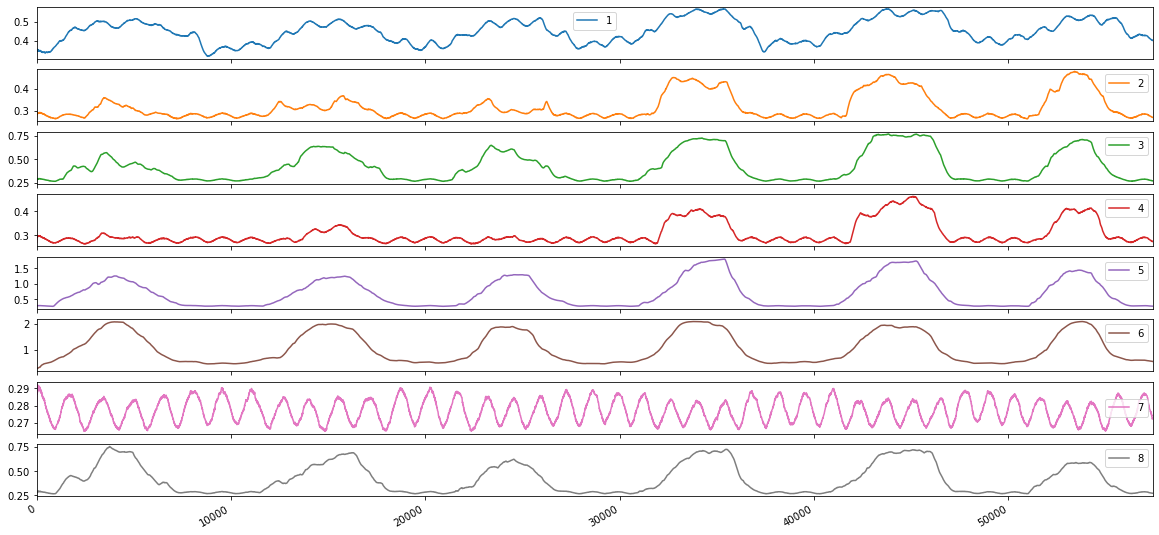

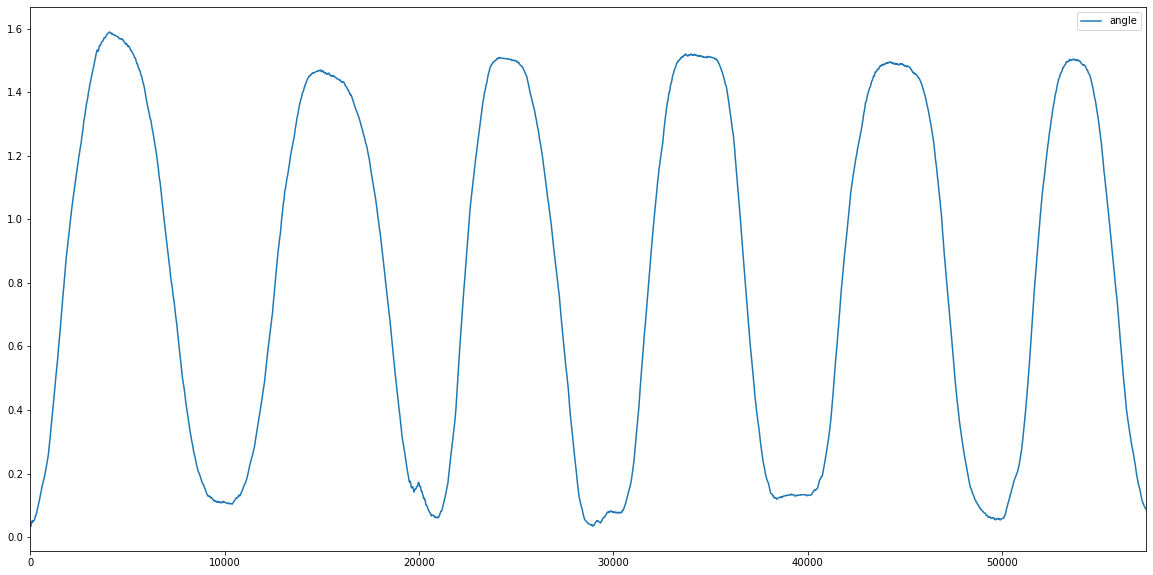

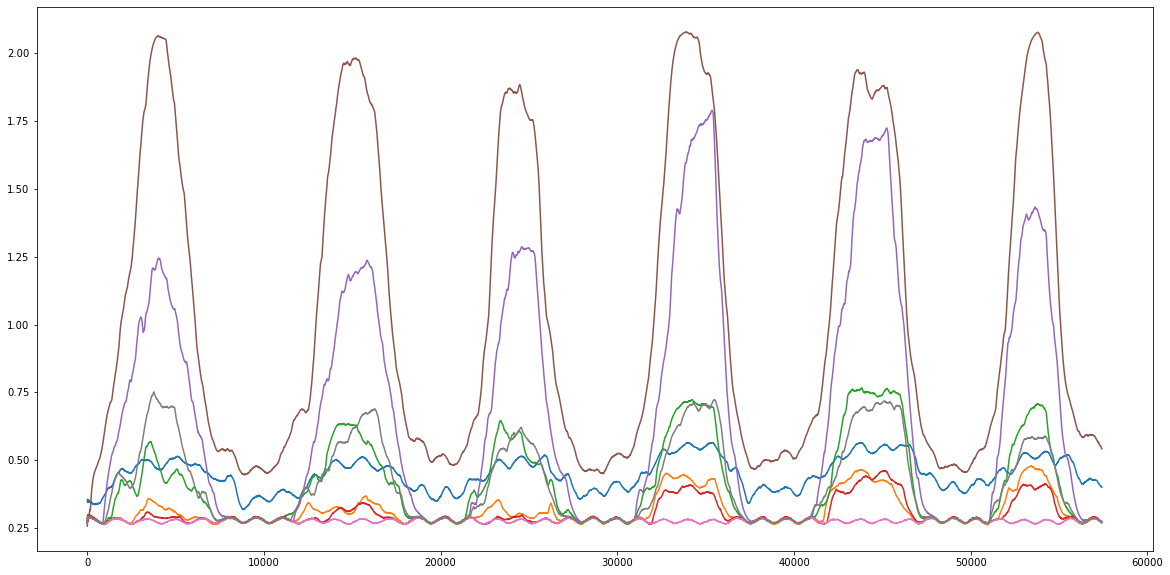

(100, 8)
(4781, 100, 8) (761, 100, 8)
39101 6072
Working on dataset: Datasets\SessionToSessionTwo.xlsx data_NonUniform TRAIN SET number 10


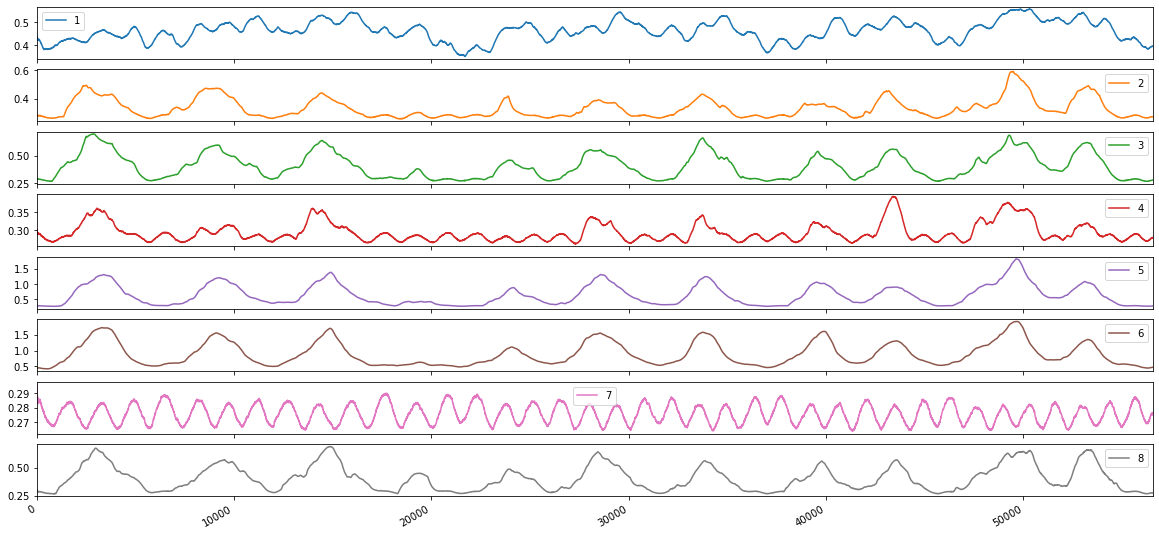

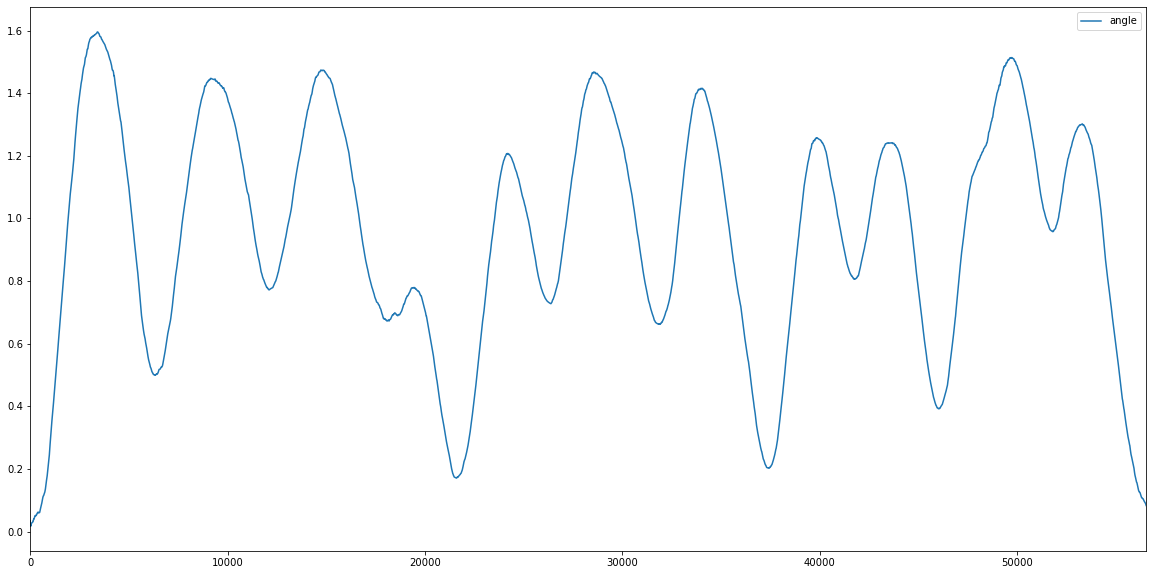

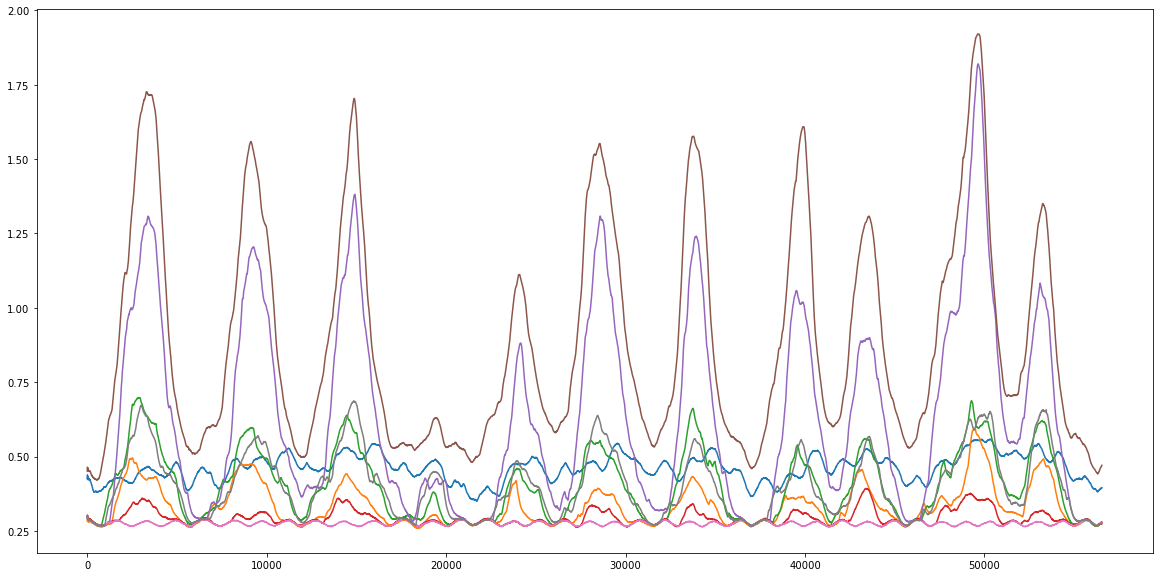

(100, 8)
(4706, 100, 8) (748, 100, 8)
43807 6820
Working on dataset: Datasets\SessionToSessionTwo.xlsx data_NonUniformTwo TRAIN SET number 11


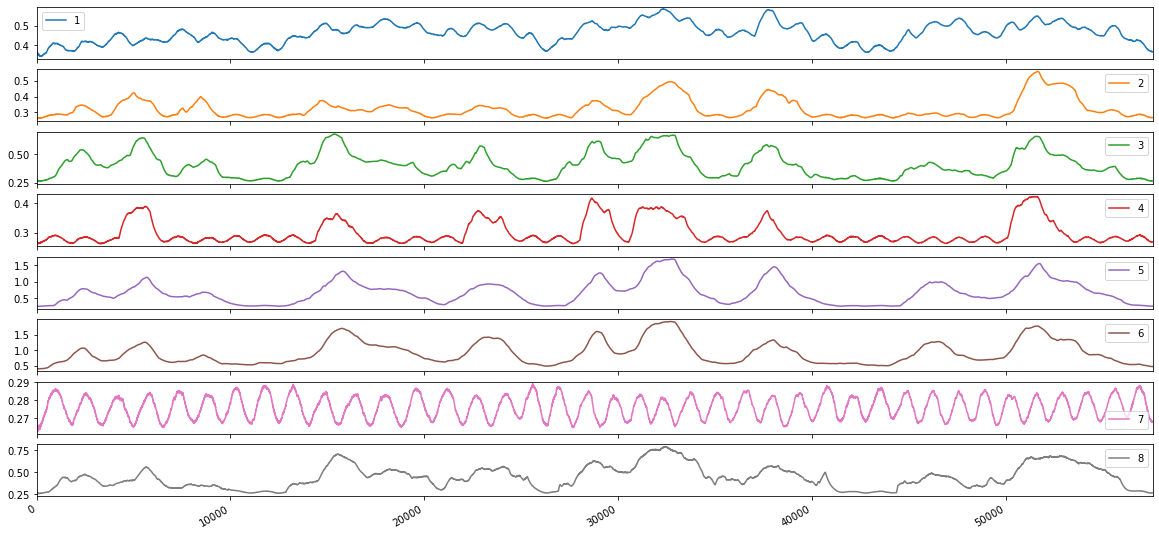

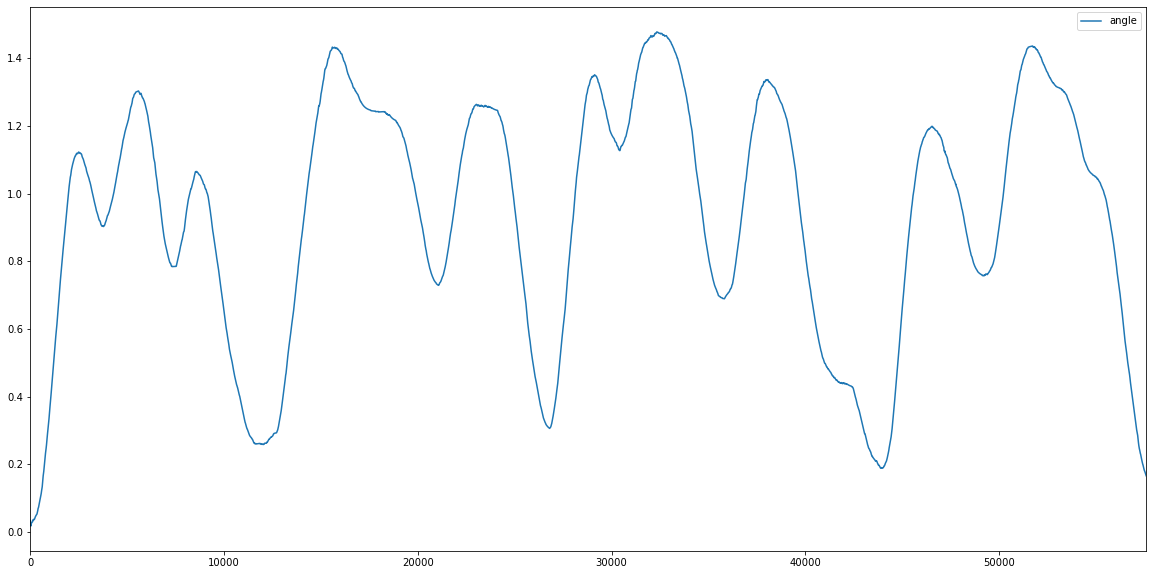

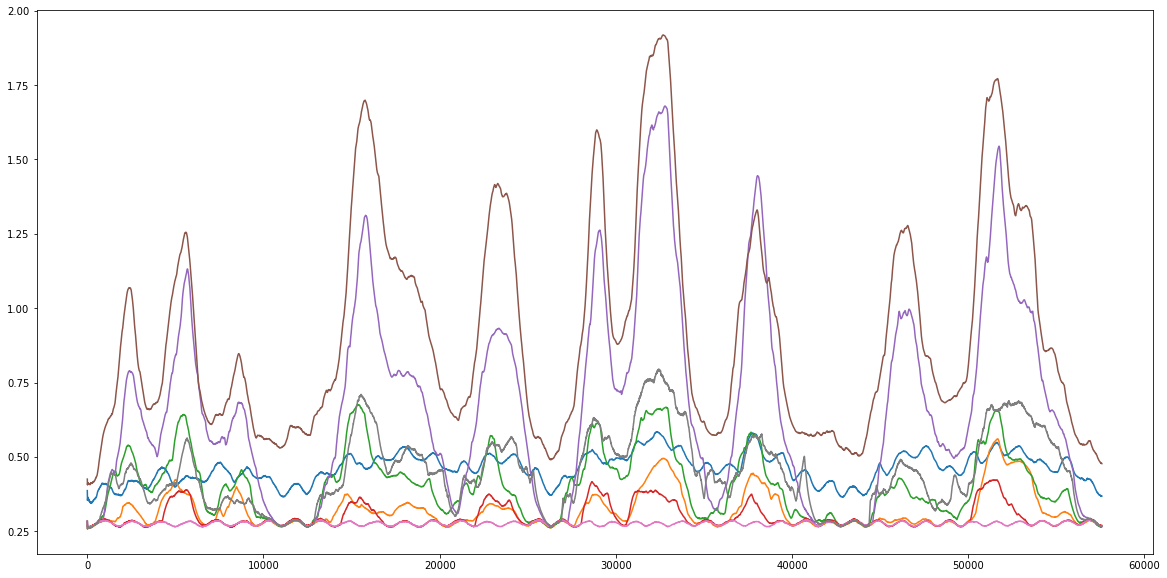

(100, 8)
(4795, 100, 8) (763, 100, 8)
48602 7583
Working on dataset: Datasets\SessionToSessionThree.xlsx data_Uniform TRAIN SET number 12


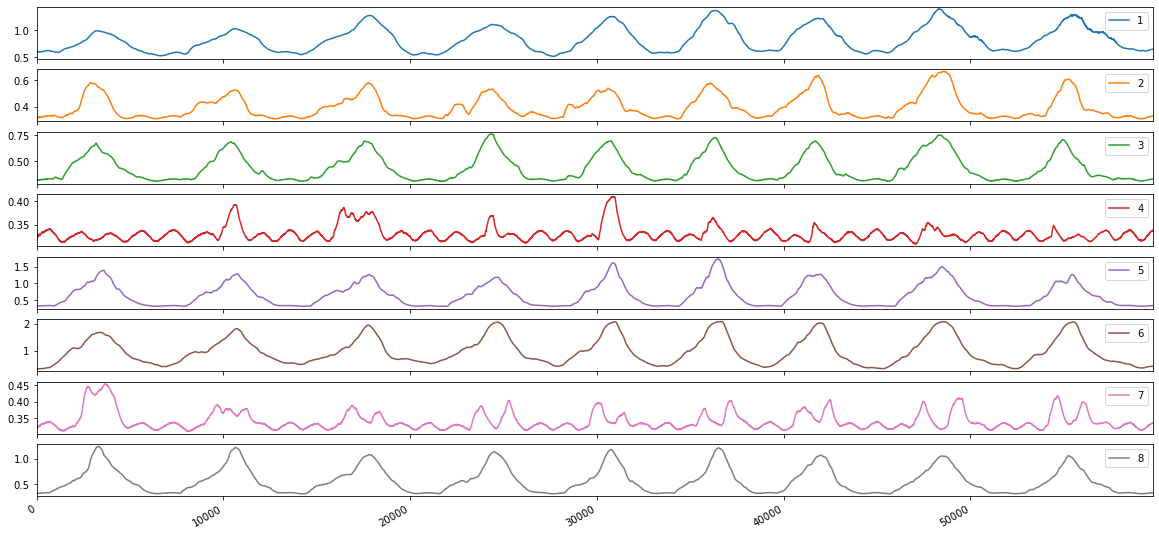

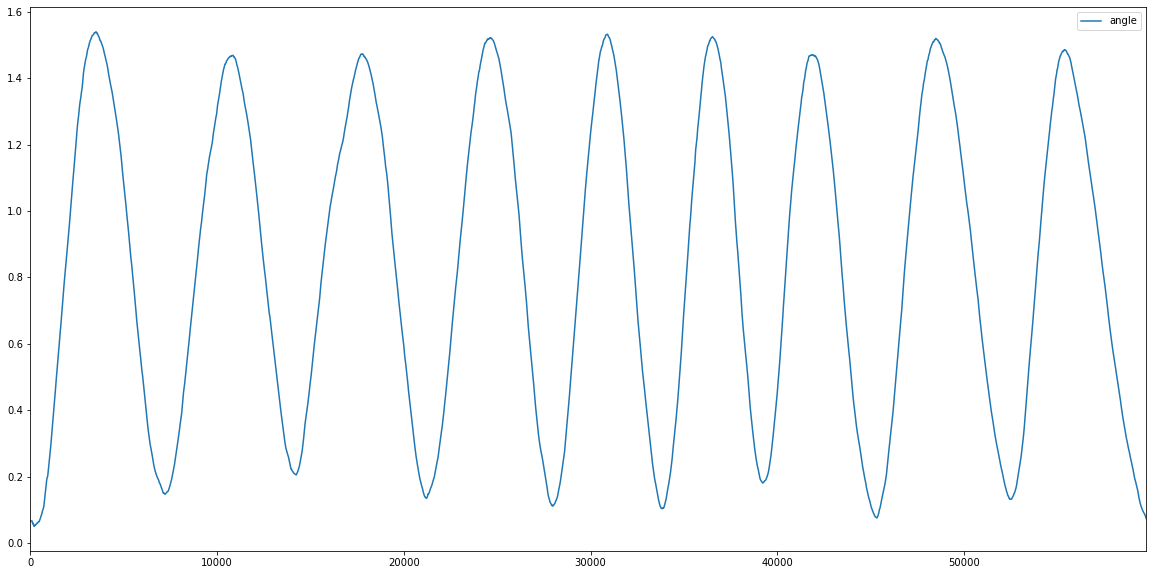

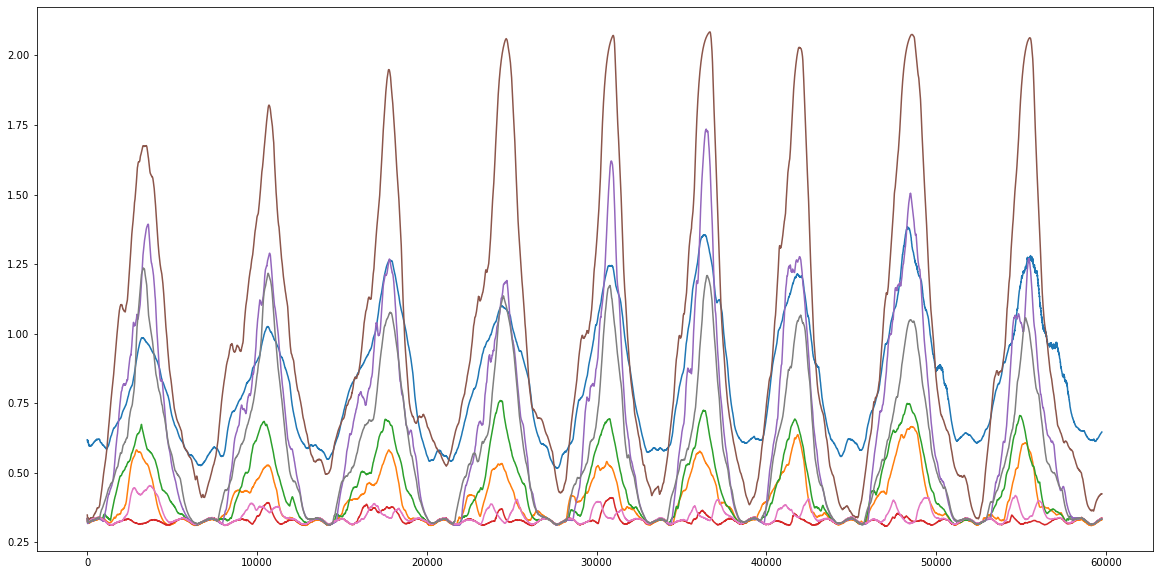

(100, 8)
(4979, 100, 8) (796, 100, 8)
53581 8379
Working on dataset: Datasets\SessionToSessionThree.xlsx data_UniformTwo TRAIN SET number 13


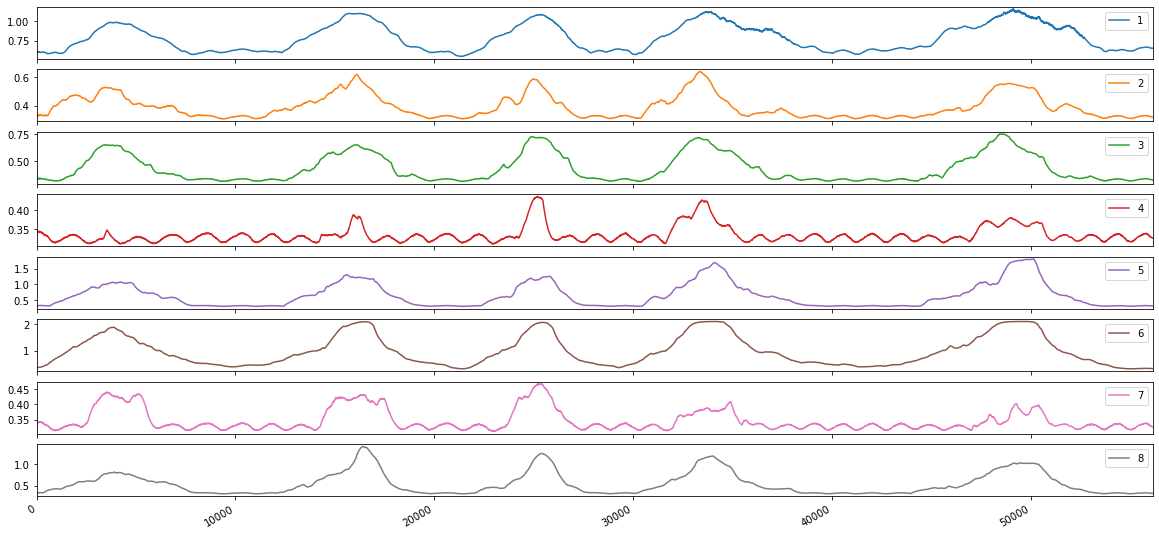

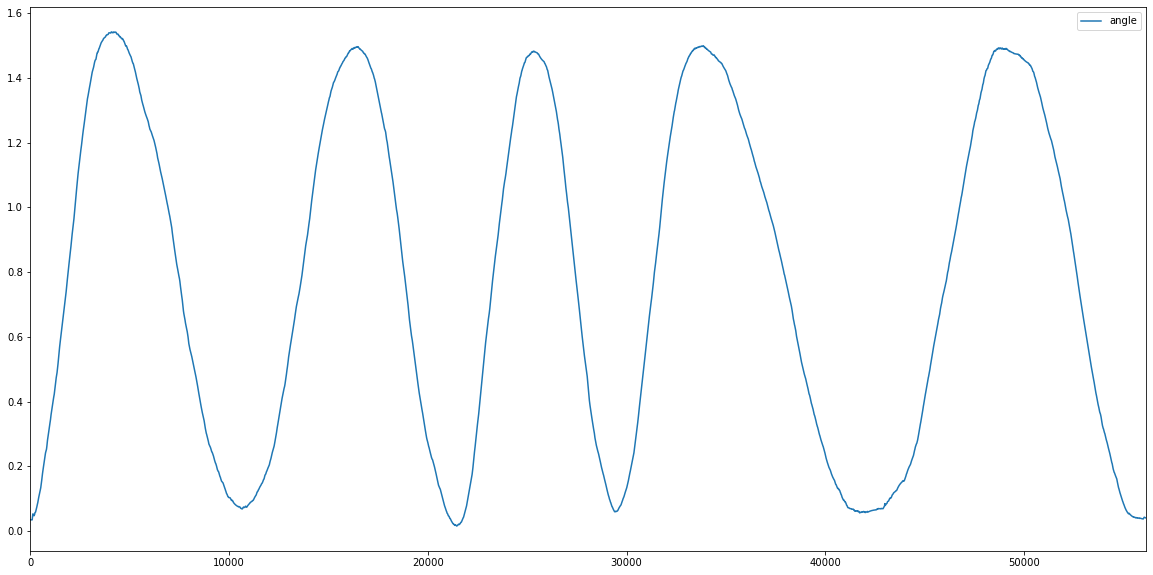

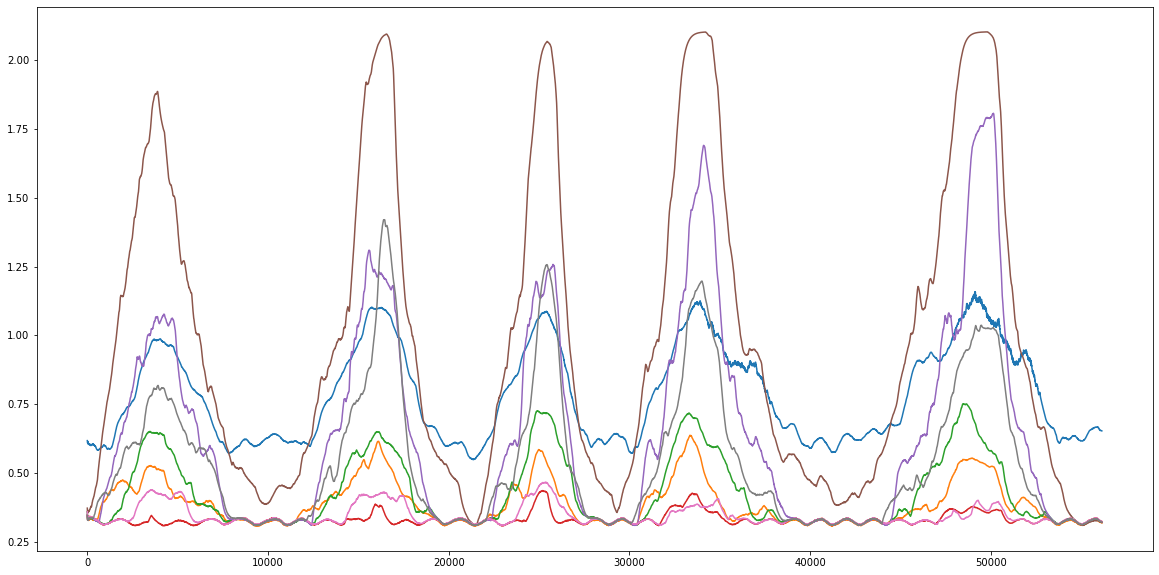

(100, 8)
(4672, 100, 8) (742, 100, 8)
58253 9121
Working on dataset: Datasets\SessionToSessionThree.xlsx data_NonUniform TRAIN SET number 14


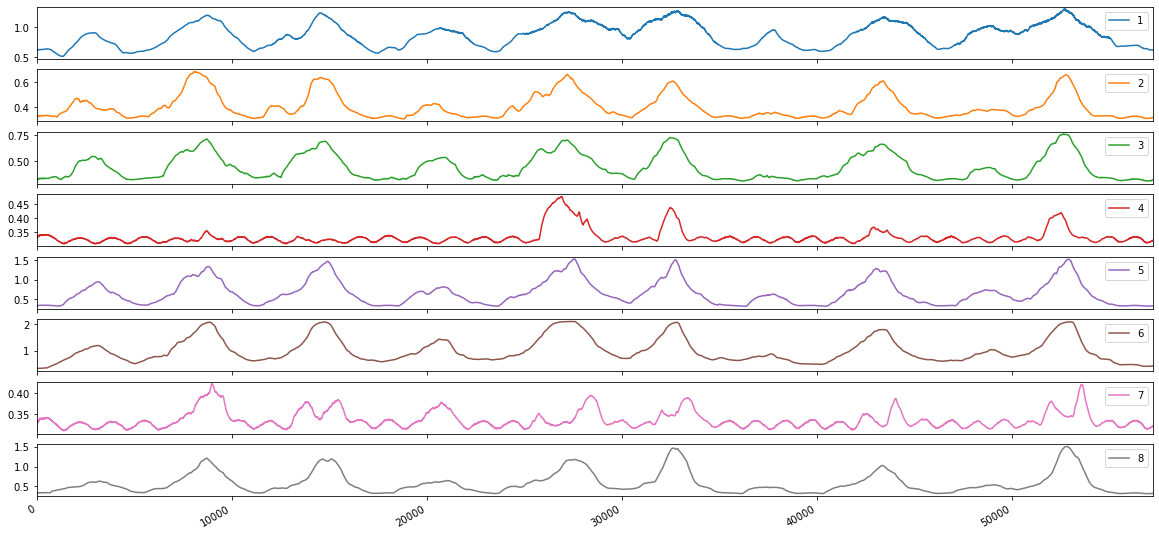

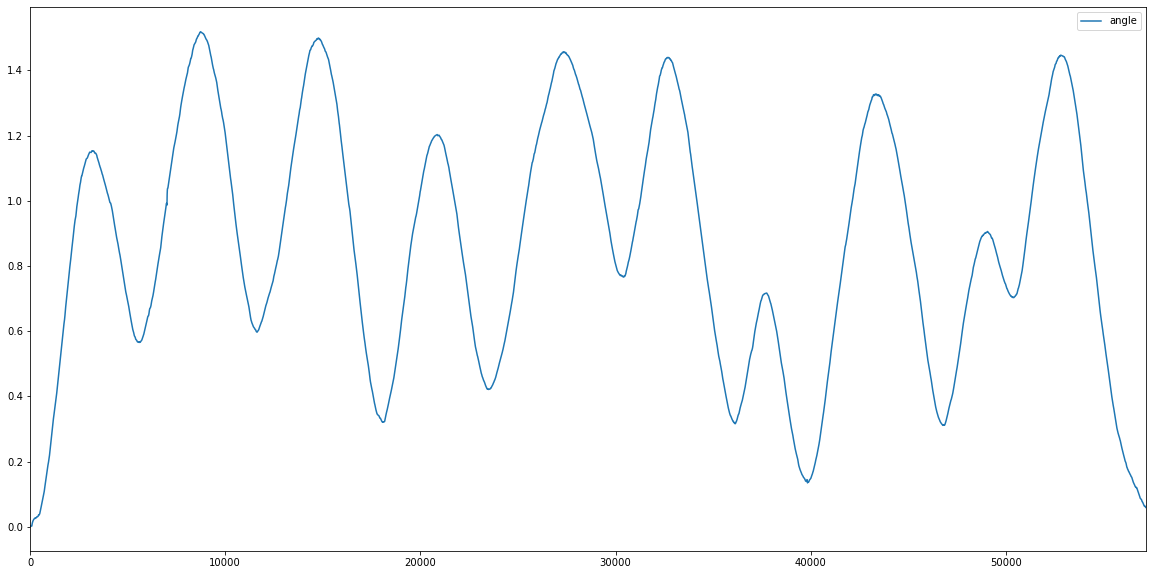

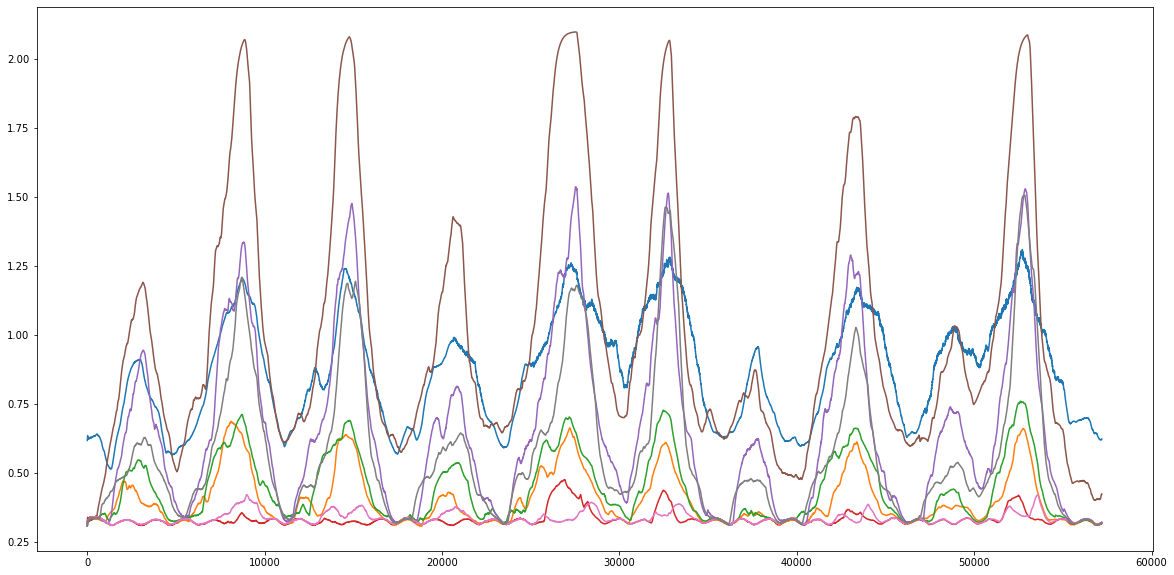

(100, 8)
(4762, 100, 8) (758, 100, 8)
63015 9879
Working on dataset: Datasets\SessionToSessionThree.xlsx data_NonUniformTwo TRAIN SET number 15


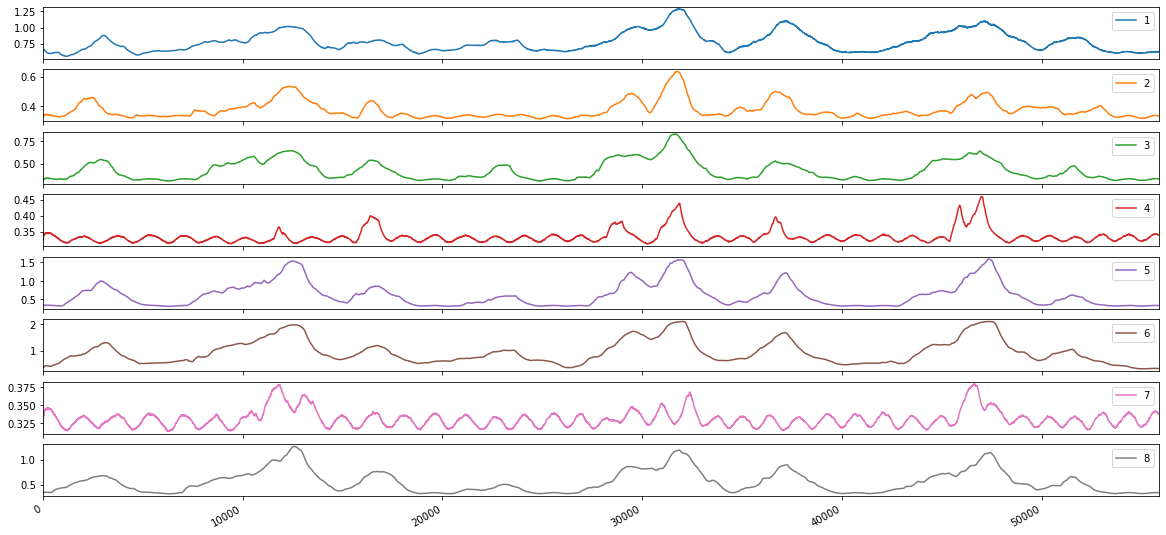

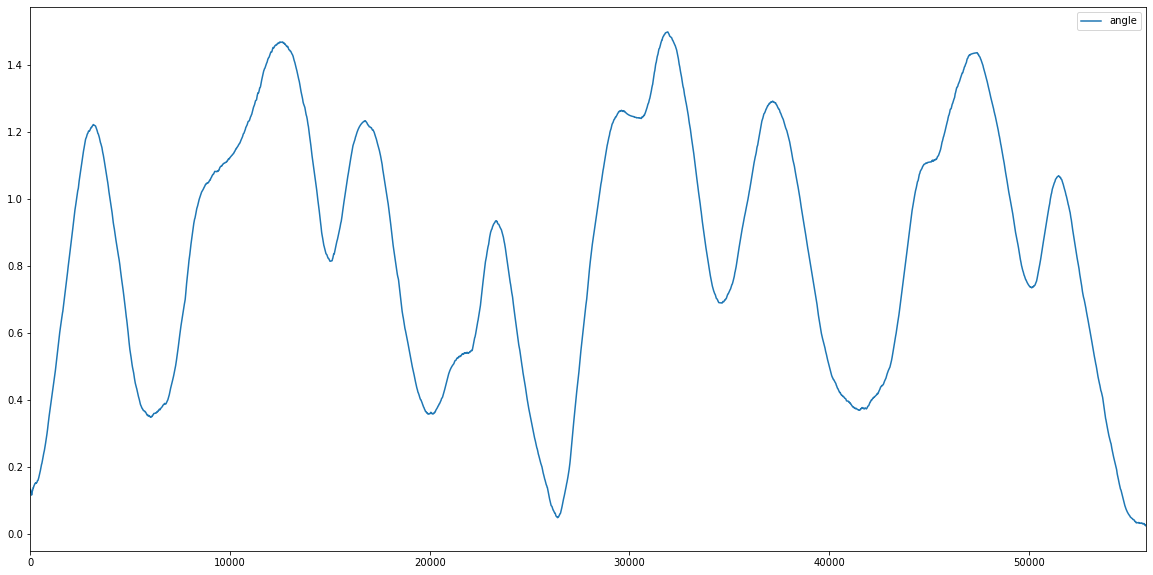

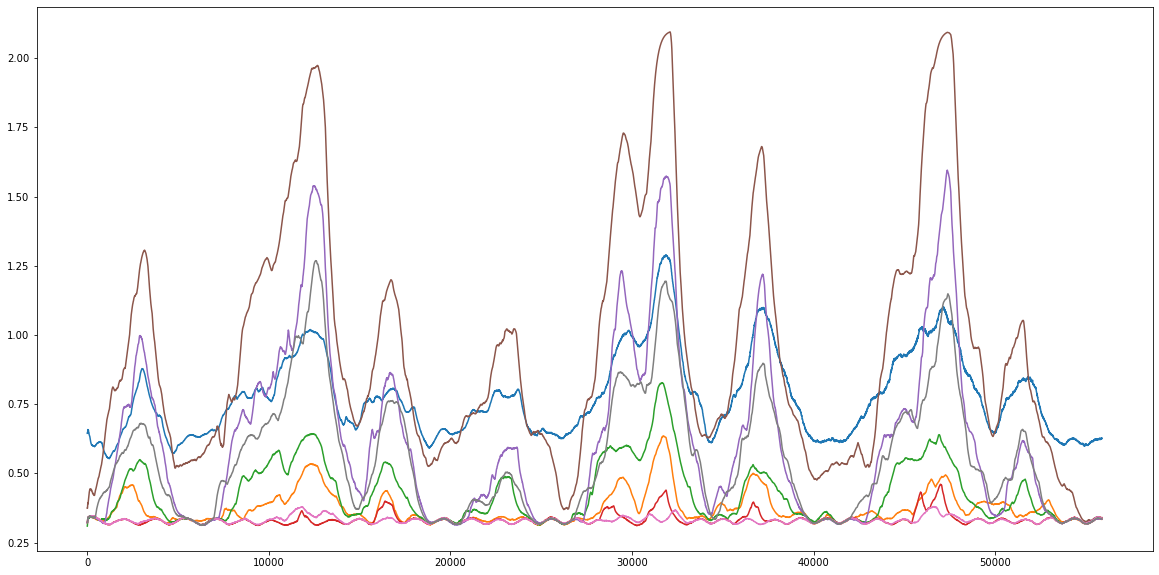

(100, 8)
(4649, 100, 8) (738, 100, 8)
67664 10617
Working on dataset: Datasets\SessionToSessionFour.xlsx data_NonUniform TEST SET number 16


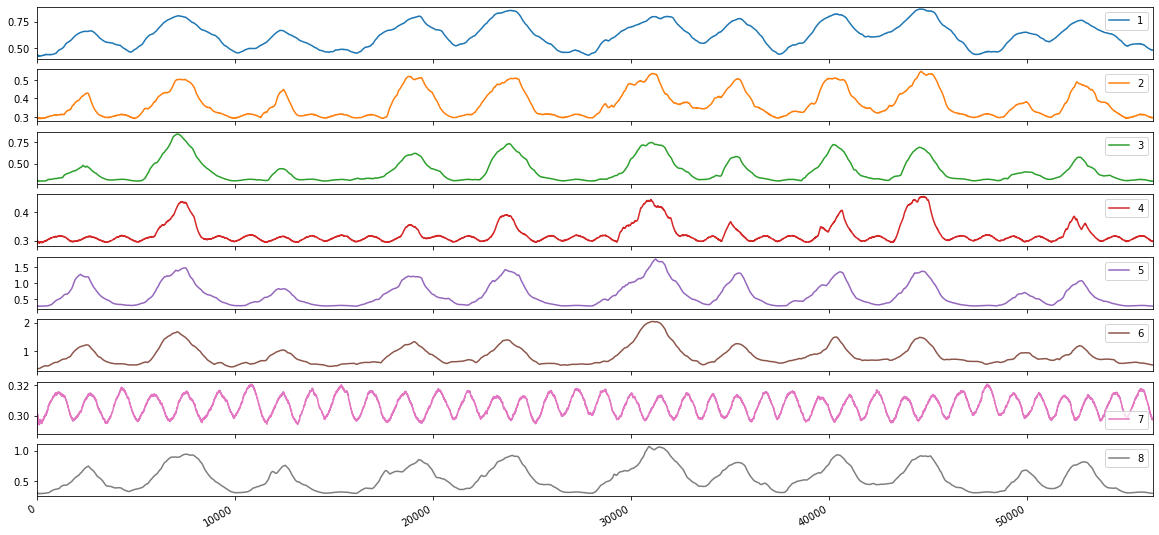

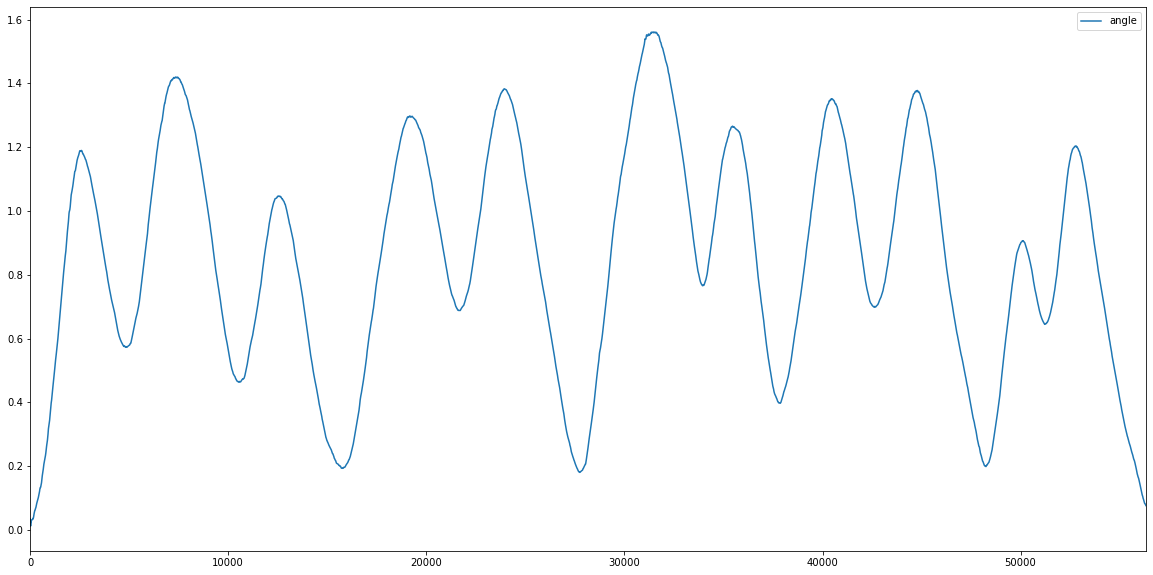

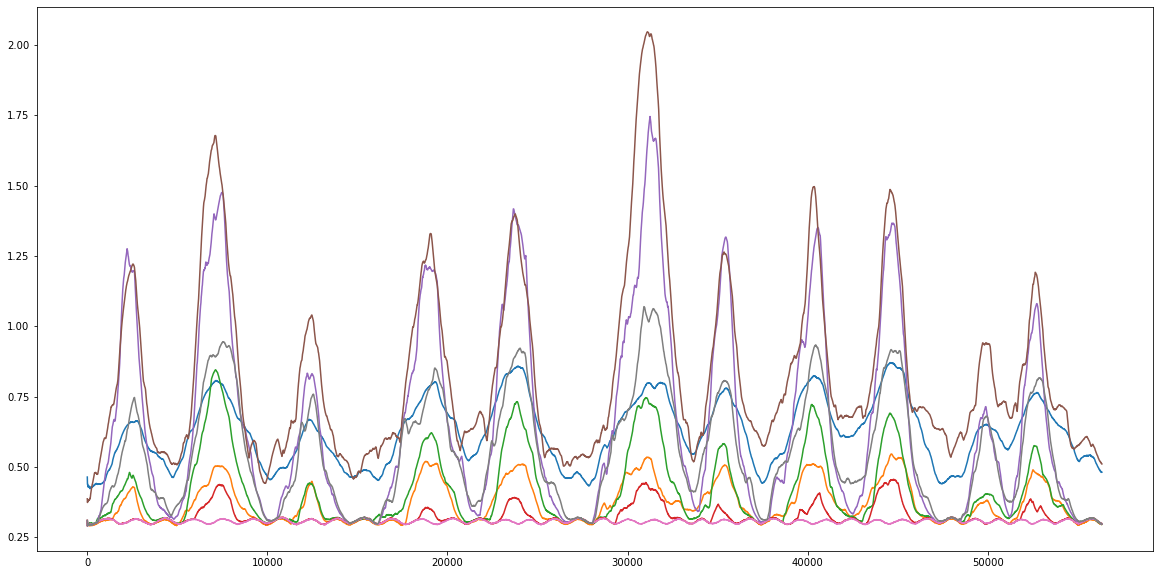

(100, 8)
(5535, 100, 8) (0,)
5535 0
Working on dataset: Datasets\SessionToSessionFour.xlsx data_NonUniformTwo TEST SET number 17


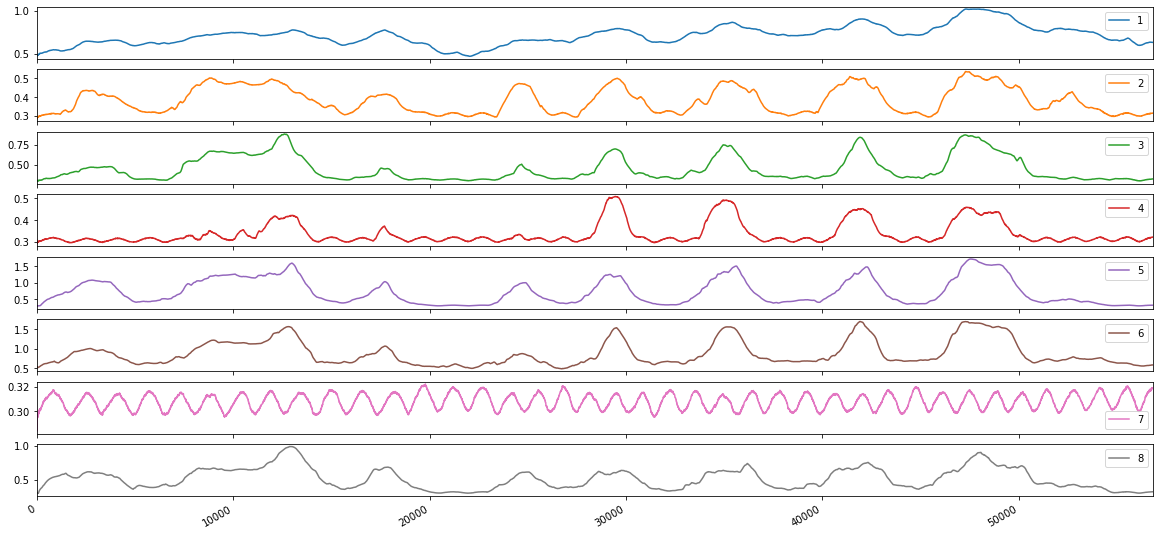

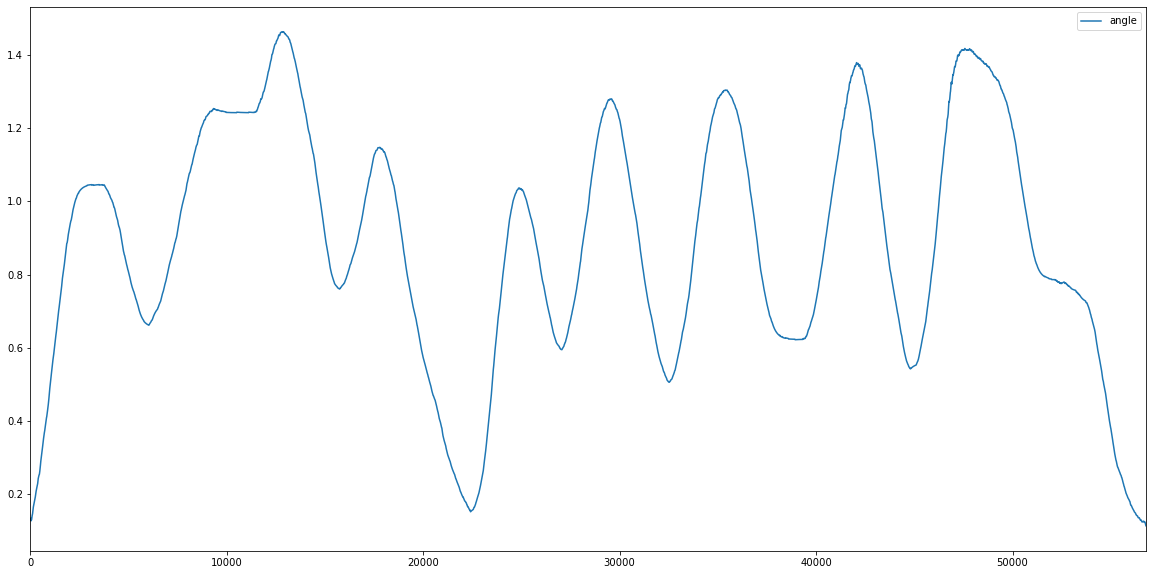

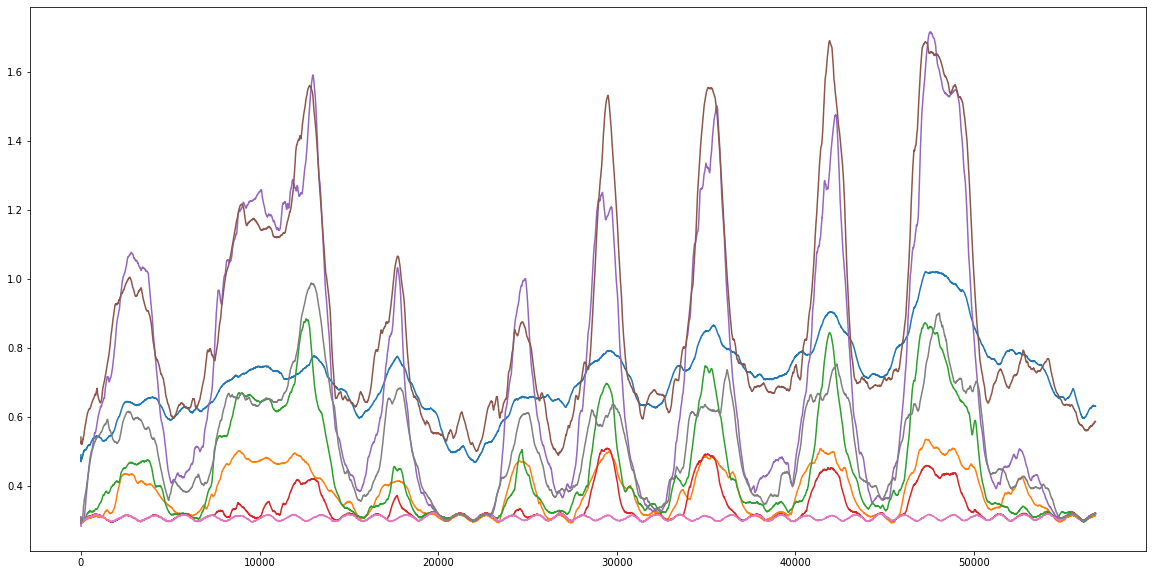

(100, 8)
(5581, 100, 8) (0,)
11116 0
Working on dataset: Datasets\SessionToSessionFour.xlsx data_Uniform TEST SET number 18


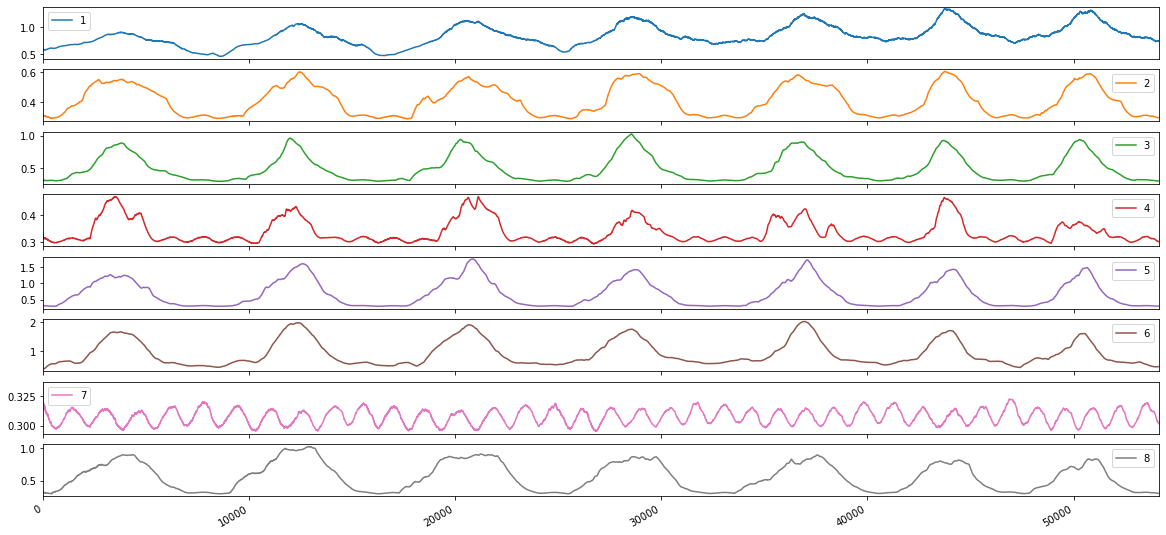

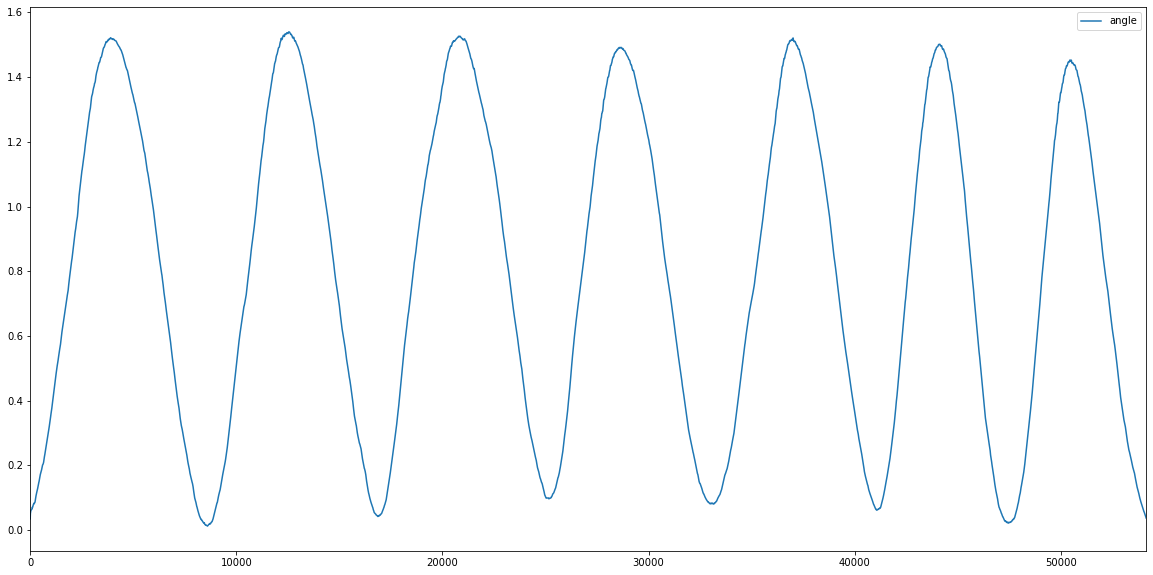

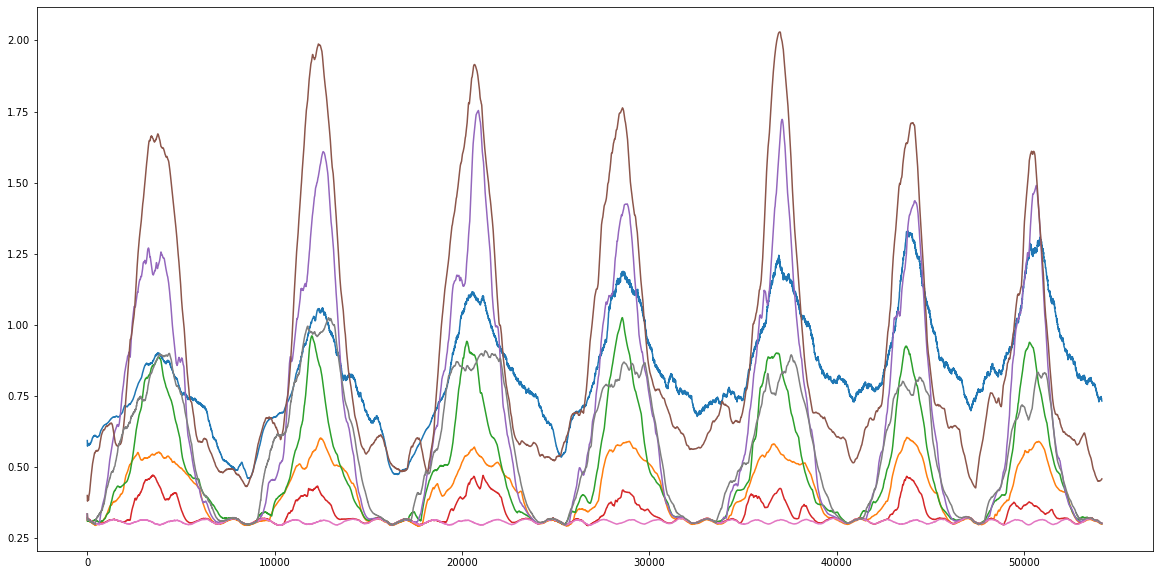

(100, 8)
(5315, 100, 8) (0,)
16431 0
Working on dataset: Datasets\SessionToSessionFour.xlsx data_Uniform PLOTTING SET number 18


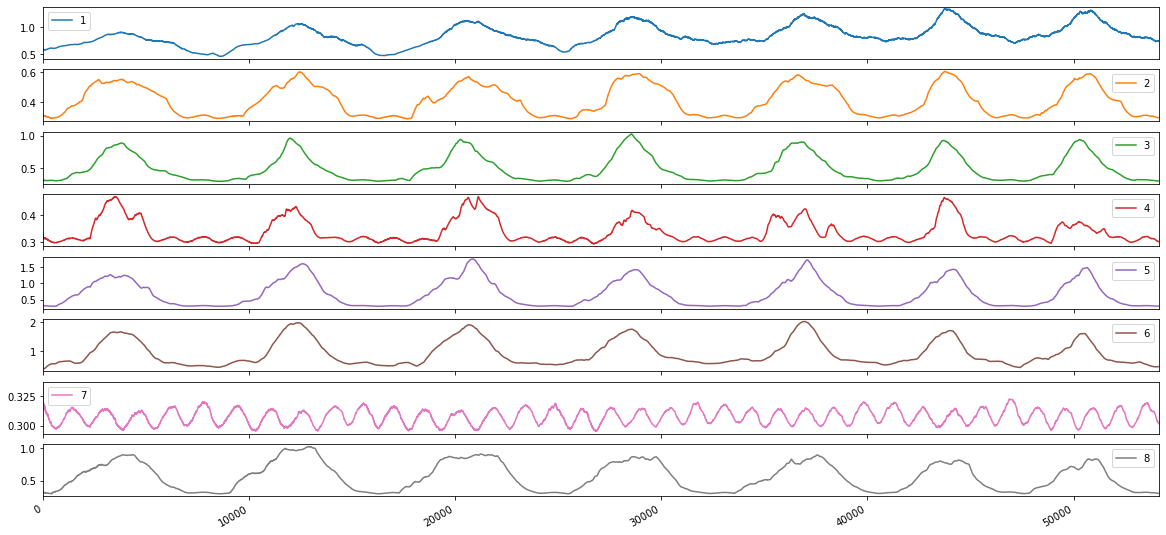

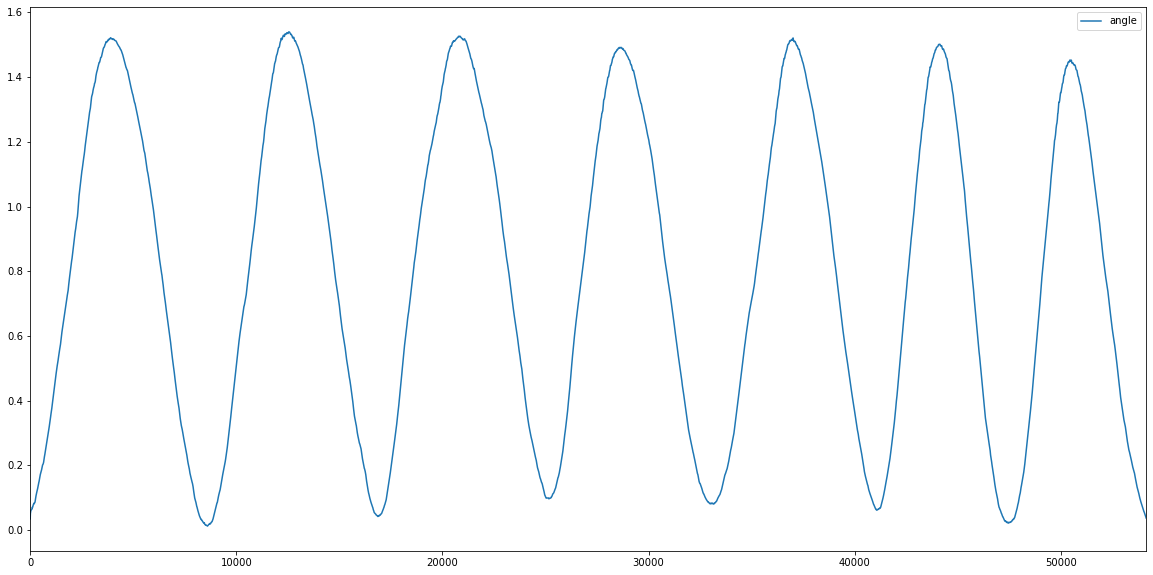

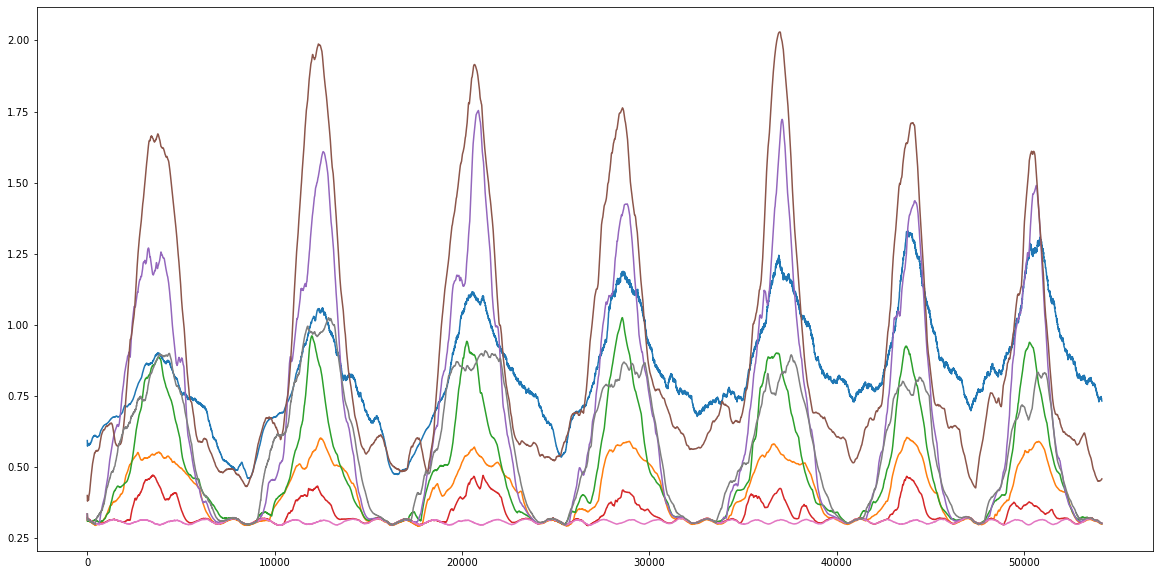

(100, 8)
(5315, 100, 8) (0,)
5315 0


In [5]:
DATASET_FILE_PATH=["Datasets\\SingleSessionData.xlsx","Datasets\\SingleSessionData.xlsx","Datasets\\SingleSessionData.xlsx","Datasets\\SingleSessionData.xlsx","Datasets\\SessionToSessionOne.xlsx","Datasets\\SessionToSessionOne.xlsx","Datasets\\SessionToSessionOne.xlsx","Datasets\\SessionToSessionOne.xlsx","Datasets\\SessionToSessionTwo.xlsx","Datasets\\SessionToSessionTwo.xlsx","Datasets\\SessionToSessionTwo.xlsx","Datasets\\SessionToSessionTwo.xlsx","Datasets\\SessionToSessionThree.xlsx","Datasets\\SessionToSessionThree.xlsx","Datasets\\SessionToSessionThree.xlsx","Datasets\\SessionToSessionThree.xlsx","Datasets\\SessionToSessionFour.xlsx","Datasets\\SessionToSessionFour.xlsx","Datasets\\SessionToSessionFour.xlsx","Datasets\\SessionToSessionFour.xlsx"]
DATASET_SHEET_TITLE=["data_Uniform","data_NonUniform","data_NonUniformWithPause","data_NonUniformTwo","data_Uniform","data_NonUniform","data_NonUniformWithPause","data_UniformWithPause","data_Uniform","data_UniformTwo","data_NonUniform","data_NonUniformTwo","data_Uniform","data_UniformTwo","data_NonUniform","data_NonUniformTwo","data_NonUniform","data_NonUniformTwo","data_Uniform","data_UniformTwo"]
GRANULARITY=10
STEP_SIZE_SLIDING_WINDOW=1
PAST_HISTORY=100
FUTURE_TARGET=1
VAL_PERCENT=0.15
EPOCHS=100 # Max epochs, in case early stopping doesn't take effect
MIN_DELTA=0.0001
PATIENCE=20
BATCH_SIZE=500
SMOOTHING=50
SHUFFLE_BUFFER_SIZE=0
MEAN=False
USE_REF_POINTS=False
REF_POINT1=0
REF_POINT2=7

plt.rcParams["figure.figsize"] = (20,10)

# Load data
batch_train, batch_val, batch_test, batch_plot, test_ground_truth, train_slices, val_slices, test_data_indexes, data_shape = process_data(
    DATASET_FILE_PATH, DATASET_SHEET_TITLE, GRANULARITY, SMOOTHING, VAL_PERCENT, PAST_HISTORY, 
    FUTURE_TARGET, STEP_SIZE_SLIDING_WINDOW, BATCH_SIZE, EPOCHS, SHUFFLE_BUFFER_SIZE, MEAN, 
    USE_REF_POINTS, REF_POINT1, REF_POINT2)

In [ ]:
ATTEMPT_NAME="CNN_BASELINE"
KERNEL_SIZE=2
PADDING="causal"
FILTERS=2 # WE DONT USE THIS ONE

model, training_history, training_time = run_cnn(data_shape, batch_train, batch_val, train_slices, val_slices, BATCH_SIZE, EPOCHS, FUTURE_TARGET, KERNEL_SIZE, FILTERS, PADDING, MIN_DELTA, PATIENCE) 
evaluate_results(model, training_history, test_ground_truth, batch_test, batch_plot, test_data_indexes, training_time)

In [ ]:
ATTEMPT_NAME="NN_BASELINE"
DENSE_SIZE = 200
DENSE_LAYER_NUM = 1

model, training_history, training_time = run_nn(data_shape, batch_train, batch_val, train_slices, val_slices, BATCH_SIZE, EPOCHS, FUTURE_TARGET, DENSE_SIZE, DENSE_LAYER_NUM, MIN_DELTA, PATIENCE)
evaluate_results(model, training_history, test_ground_truth, batch_test, batch_plot, test_data_indexes, training_time)

In [ ]:
ATTEMPT_NAME="LSTM_BASELINE"
LAYER_SIZE = 32

model, training_history, training_time = run_lstm(data_shape, batch_train, batch_val, train_slices, val_slices, BATCH_SIZE, EPOCHS, FUTURE_TARGET, MIN_DELTA, PATIENCE, LAYER_SIZE)
evaluate_results(model, training_history, test_ground_truth, batch_test, batch_plot, test_data_indexes, training_time)

In [ ]:
ATTEMPT_NAME="PARALLEL_BASELINE"
KERNEL_SIZE=10
FILTERS=32
PADDING="valid"
LAYER_SIZE = 32

model, training_history, training_time = run_parallel(data_shape, batch_train, batch_val, train_slices, val_slices, BATCH_SIZE, EPOCHS, FUTURE_TARGET, MIN_DELTA, PATIENCE, KERNEL_SIZE, FILTERS, PADDING, LAYER_SIZE)
evaluate_results(model, training_history, test_ground_truth, batch_test, batch_plot, test_data_indexes, training_time)

In [ ]:
ATTEMPT_NAME="PARALLEL_DEEP"
KERNEL_SIZE=2
FILTERS=2 # WE DONT USE THIS
PADDING="causal"
LAYER_SIZE = 32
DENSE_SIZE = 32

model, training_history, training_time = run_parallel_deep(data_shape, batch_train, batch_val, train_slices, val_slices, BATCH_SIZE, EPOCHS, FUTURE_TARGET, MIN_DELTA, PATIENCE, KERNEL_SIZE, FILTERS, PADDING, LAYER_SIZE, DENSE_SIZE)
evaluate_results(model, training_history, test_ground_truth, batch_test, batch_plot, test_data_indexes, training_time)

In [ ]:
ATTEMPT_NAME="NN_BASELINE"
DENSE_SIZE = 200
DENSE_LAYER_NUM = 1

model, training_history, training_time = run_nn(data_shape, batch_train, batch_val, train_slices, val_slices, BATCH_SIZE, EPOCHS, FUTURE_TARGET, DENSE_SIZE, DENSE_LAYER_NUM, MIN_DELTA, PATIENCE)
evaluate_results(model, training_history, test_ground_truth, batch_test, batch_plot, test_data_indexes, training_time)

In [ ]:
ATTEMPT_NAME="NN_BASELINE"
DENSE_SIZE = 200
DENSE_LAYER_NUM = 1

model, training_history, training_time = run_nn(data_shape, batch_train, batch_val, train_slices, val_slices, BATCH_SIZE, EPOCHS, FUTURE_TARGET, DENSE_SIZE, DENSE_LAYER_NUM, MIN_DELTA, PATIENCE)
evaluate_results(model, training_history, test_ground_truth, batch_test, batch_plot, test_data_indexes, training_time)

#TODO MANDAG
# Parallel deep still doesn't work, presumably because it runs out of gpu ram
# Deep model mandag, teamviewer fra stationær
# Og tal om hvordan lstm-chaining det virker, skriv det i rapport: hvad er intuitionen?

# Save last plotting set picture from mean as well, put it in the report. 
# Save all pictures from all sets, just to be sure.

In [ ]:
ATTEMPT_NAME="LSTM_BASELINE"
LAYER_SIZE = 32

model, training_history, training_time = run_lstm(data_shape, batch_train, batch_val, train_slices, val_slices, BATCH_SIZE, EPOCHS, FUTURE_TARGET, MIN_DELTA, PATIENCE, LAYER_SIZE)
evaluate_results(model, training_history, test_ground_truth, batch_test, batch_plot, test_data_indexes, training_time)

In [ ]:
ATTEMPT_NAME="LSTM_BASELINE"
LAYER_SIZE = 32

model, training_history, training_time = run_lstm(data_shape, batch_train, batch_val, train_slices, val_slices, BATCH_SIZE, EPOCHS, FUTURE_TARGET, MIN_DELTA, PATIENCE, LAYER_SIZE)
evaluate_results(model, training_history, test_ground_truth, batch_test, batch_plot, test_data_indexes, training_time)

In [ ]:
ATTEMPT_NAME="LSTM_BASELINE"
LAYER_SIZE = 32

model, training_history, training_time = run_lstm(data_shape, batch_train, batch_val, train_slices, val_slices, BATCH_SIZE, EPOCHS, FUTURE_TARGET, MIN_DELTA, PATIENCE, LAYER_SIZE)
evaluate_results(model, training_history, test_ground_truth, batch_test, batch_plot, test_data_indexes, training_time)